## Exploratory Data Analysis of the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_school = pd.read_csv('../dataset/dataset.csv')

In [3]:
df_school.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df_school.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [5]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

### Count of Target

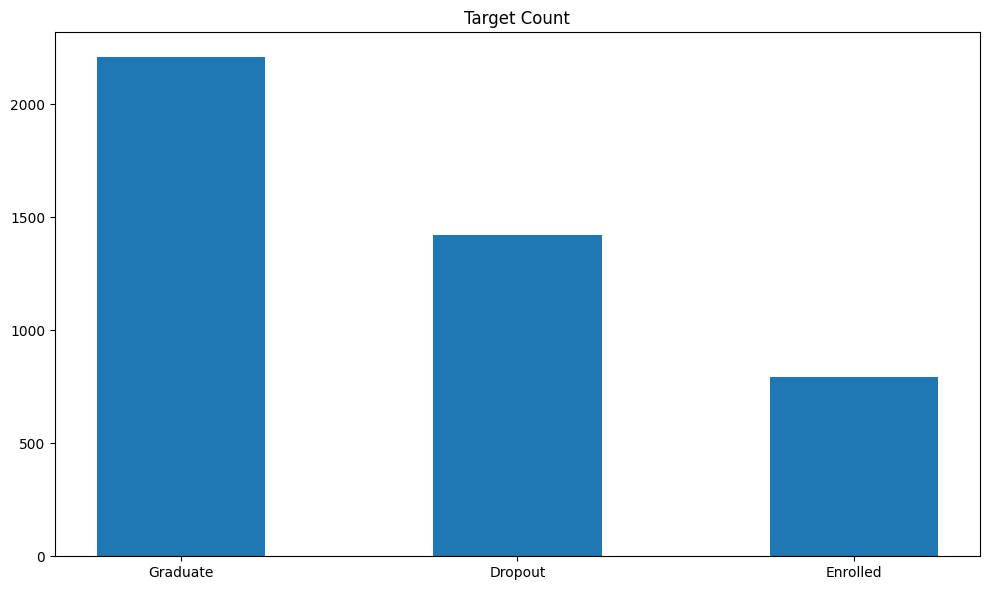

In [6]:

plt.figure(figsize=(10, 6))
class_counts = pd.DataFrame(df_school['Target'].value_counts())
class_counts.reset_index(inplace=True)
class_counts
plt.bar(class_counts['index'], class_counts['Target'], width = 0.50)
plt.title("Target Count")
plt.tight_layout()
plt.show()

### Unemployment Rate and Target, Gender

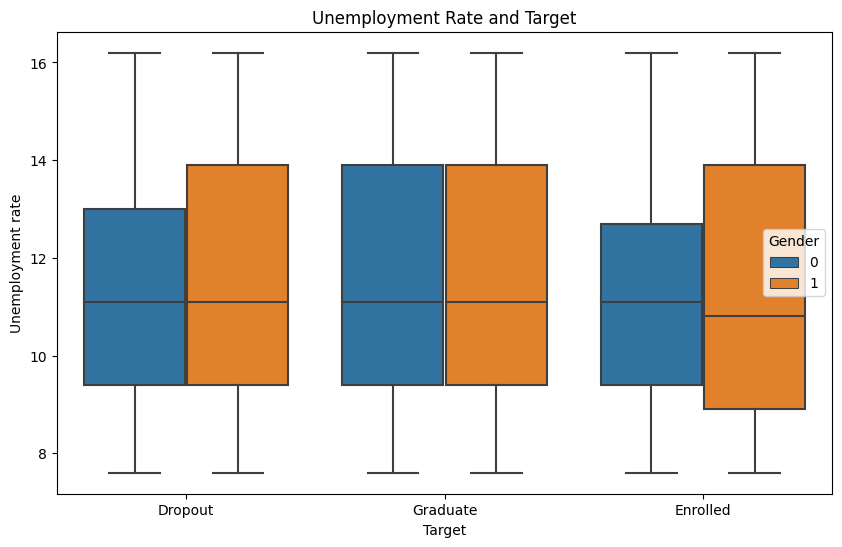

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Unemployment rate',hue='Gender', data=df_school)
plt.title('Unemployment Rate and Target')
plt.show()

Answering Questions 

### Distribution of students by gender, nationality, and age. 

In [14]:
# Function to annotate the bars with counts
def annotate_counts(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                '{:.0f}'.format(height),
                ha='center', va='bottom')



In [8]:
df_school['Gender'].unique()

array([1, 0], dtype=int64)

In [9]:
df_school['Nacionality'].unique()

array([ 1, 15,  3, 14, 12, 18,  5, 11,  8, 17,  4,  9, 13, 16, 10, 21,  2,
       20, 19,  6,  7], dtype=int64)

In [10]:
# Gender replacement
gender_replace = {
    1: 'male',
    0: 'female'
}
df_school['Gender'] = df_school['Gender'].replace(gender_replace)

# Nacionality replacement
nacionality_replace = {
    1: 'Portuguese', 2: 'German', 3: 'Spanish', 4: 'Italian', 5: 'Dutch', 6: 'English',
    7: 'Lithuanian', 8: 'Angolan', 9: 'Cape Verdean', 10: 'Guinean', 11: 'Mozambican',
    12: 'Santomean', 13: 'Turkish', 14: 'Brazilian', 15: 'Romanian', 16: 'Moldova (Republic of)',
    17: 'Mexican', 18: 'Ukrainian', 19: 'Russian', 20: 'Cuban', 21: 'Colombian'
}
df_school['Nacionality'] = df_school['Nacionality'].replace(nacionality_replace)


In [11]:
df_school['Nacionality'].unique()

array(['Portuguese', 'Romanian', 'Spanish', 'Brazilian', 'Santomean',
       'Ukrainian', 'Dutch', 'Mozambican', 'Angolan', 'Mexican',
       'Italian', 'Cape Verdean', 'Turkish', 'Moldova (Republic of)',
       'Guinean', 'Colombian', 'German', 'Cuban', 'Russian', 'English',
       'Lithuanian'], dtype=object)

In [12]:
df_school['Gender'].unique()

array(['male', 'female'], dtype=object)

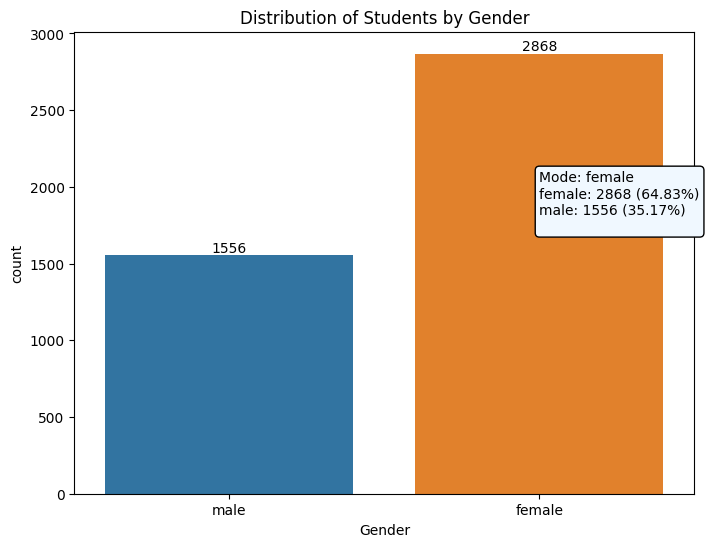

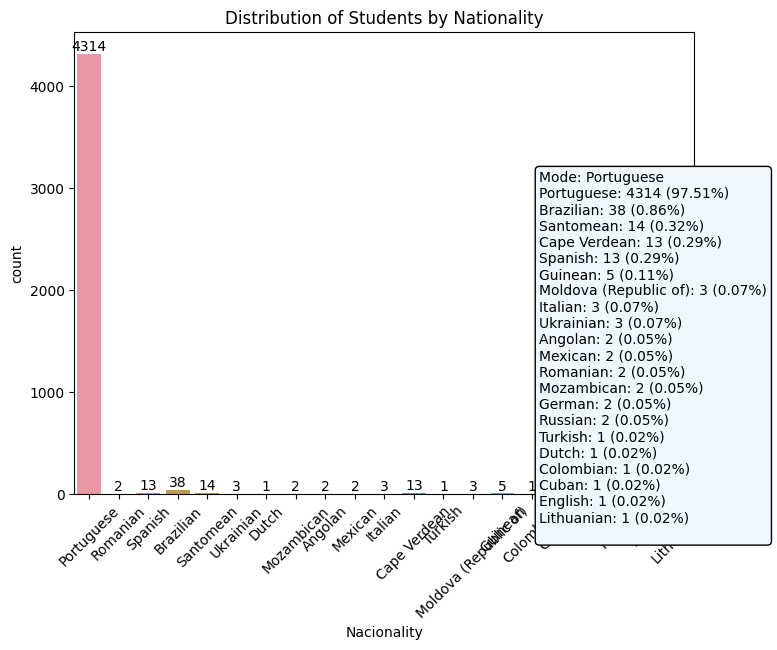

NameError: name 'annotate_stats' is not defined

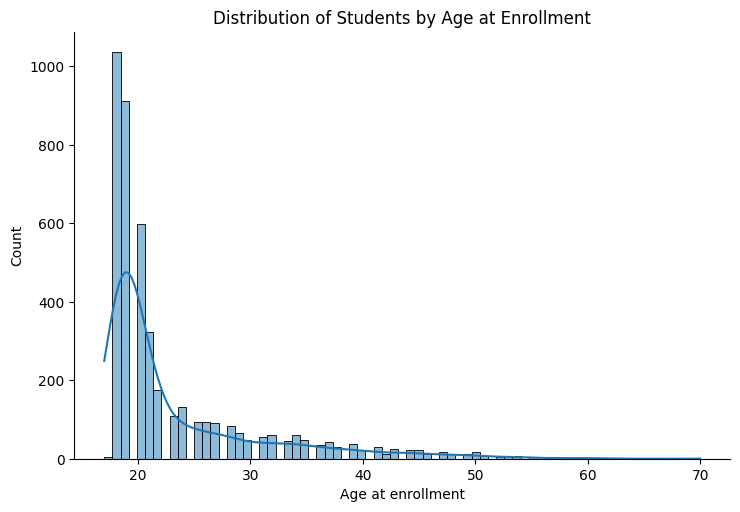

In [15]:
def annotate_categorical_stats(ax, data, ypos=0.7):
    mode = data.mode().iloc[0]  # Taking the first mode in case of multiple modes
    counts = data.value_counts().to_dict()
    total = len(data)
    
    stats_str = f'Mode: {mode}\n'
    
    for category, count in counts.items():
        percentage = 100 * count / total
        stats_str += f'{category}: {count} ({percentage:.2f}%)\n'
    
    ax.text(0.75, ypos, stats_str, transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='aliceblue'))

# Gender Distribution
plt.figure(figsize=(8, 6))
ax1 = sns.countplot(x='Gender', data=df_school)
annotate_counts(ax1)
annotate_categorical_stats(ax1, df_school['Gender'])
plt.title('Distribution of Students by Gender')
plt.show()

# Nationality Distribution
plt.figure(figsize=(8, 6))
ax2 = sns.countplot(x='Nacionality', data=df_school)
annotate_counts(ax2)
annotate_categorical_stats(ax2, df_school['Nacionality'])
plt.title('Distribution of Students by Nationality')
plt.xticks(rotation=45)
plt.show()

# Age at Enrollment Distribution
g = sns.displot(df_school['Age at enrollment'], kde=True, aspect=1.5)
g.ax.set_title('Distribution of Students by Age at Enrollment')
#annotate_stats(g.ax, df_school['Age at enrollment'])
plt.show()


In [16]:
df_school['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [18]:
# Filtering out students who have completed (either graduated or dropped out)
completed_students = df_school[df_school['Target'] != 'Enrolled']

# For male students
male_students = completed_students[completed_students['Gender'] == 'male']
male_dropouts = male_students[male_students['Target'] == 'Dropout']
male_dropout_rate = (len(male_dropouts) / len(male_students)) * 100 if len(male_students) > 0 else 0

# For female students
female_students = completed_students[completed_students['Gender'] == 'female']
female_dropouts = female_students[female_students['Target'] == 'Dropout']
female_dropout_rate = (len(female_dropouts) / len(female_students)) * 100 if len(female_students) > 0 else 0

print(f"Male Dropout Rate: {male_dropout_rate:.2f}%")
print(f"Female Dropout Rate: {female_dropout_rate:.2f}%")


Male Dropout Rate: 56.12%
Female Dropout Rate: 30.24%


- Differences between dropouts and graduates.

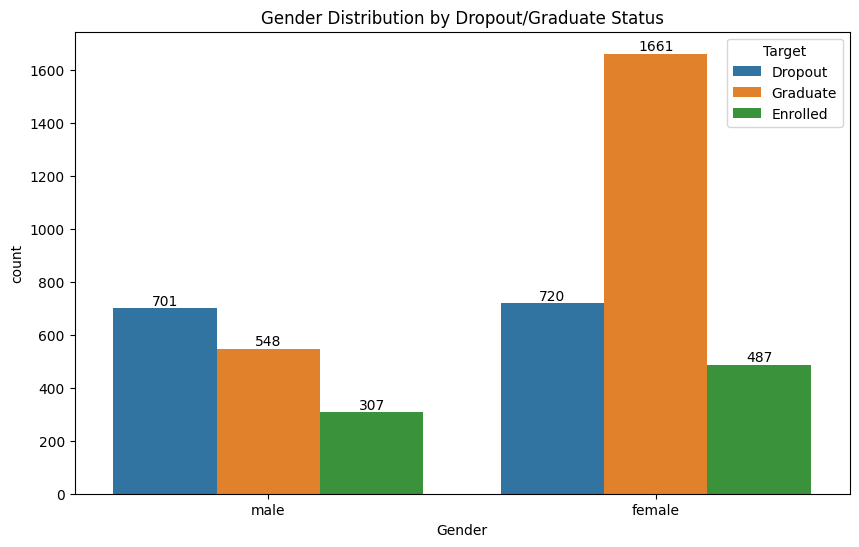

In [19]:
# Gender vs Target (Dropout/Graduate)
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(x='Gender', hue='Target', data=df_school)
annotate_counts(ax1)
plt.title('Gender Distribution by Dropout/Graduate Status')
plt.show()



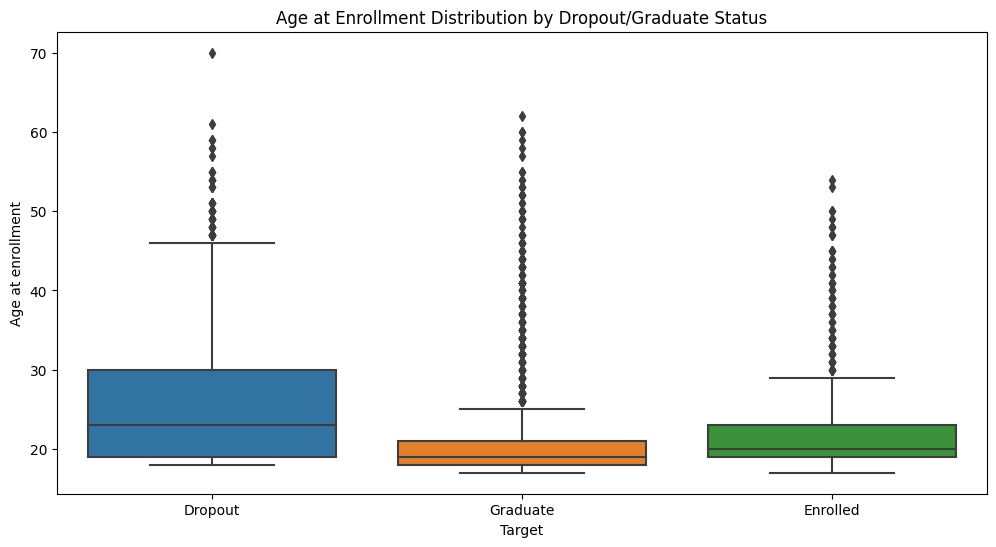

Statistics for Dropouts:
Median: 23.00
Q1 (25th percentile): 19.00
Q3 (75th percentile): 30.00
IQR (Interquartile Range): 11.00
Whisker Top: 46.50
Whisker Bottom: 18.00
-----------------------------
Statistics for Graduates:
Median: 19.00
Q1 (25th percentile): 18.00
Q3 (75th percentile): 21.00
IQR (Interquartile Range): 3.00
Whisker Top: 25.50
Whisker Bottom: 17.00
-----------------------------


In [21]:
# Define a function to print the relevant statistics
def print_statistics(data):
    Q1 = data.quantile(0.25)
    median = data.median()
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    whisker_top = min(data.max(), Q3 + 1.5 * IQR)
    whisker_bottom = max(data.min(), Q1 - 1.5 * IQR)

    print(f"Median: {median:.2f}")
    print(f"Q1 (25th percentile): {Q1:.2f}")
    print(f"Q3 (75th percentile): {Q3:.2f}")
    print(f"IQR (Interquartile Range): {IQR:.2f}")
    print(f"Whisker Top: {whisker_top:.2f}")
    print(f"Whisker Bottom: {whisker_bottom:.2f}")
    print("-----------------------------")

# Plotting the boxplot
plt.figure(figsize=(12, 6))
ax3 = sns.boxplot(x='Target', y='Age at enrollment', data=df_school)
plt.title('Age at Enrollment Distribution by Dropout/Graduate Status')
plt.show()

# Calculating and printing statistics for each group
print("Statistics for Dropouts:")
print_statistics(df_school[df_school['Target'] == 'Dropout']['Age at enrollment'])
print("Statistics for Graduates:")
print_statistics(df_school[df_school['Target'] == 'Graduate']['Age at enrollment'])


Relationship between marital status and likelihood to drop out.

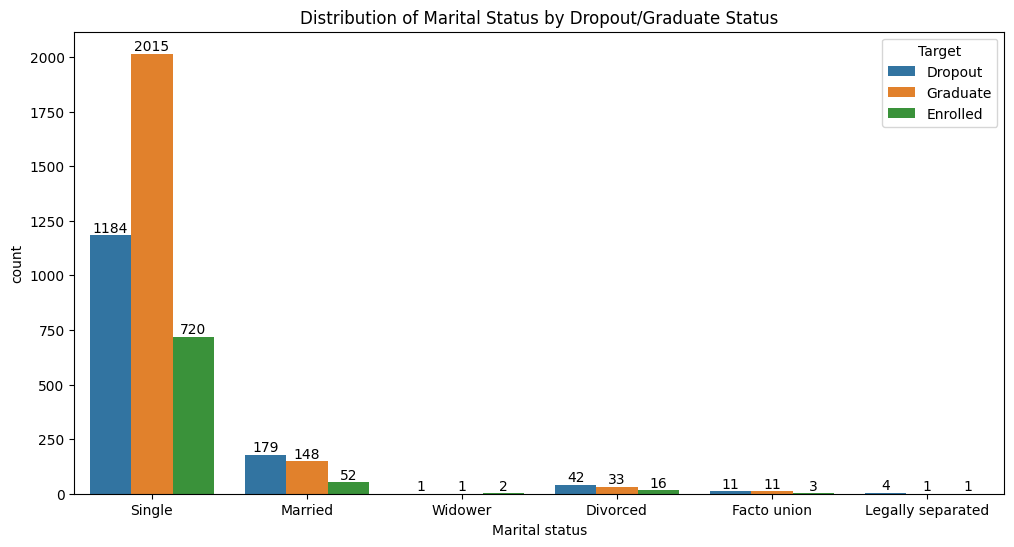

In [22]:
# Replace the values in 'Marital status'
marital_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

df_school['Marital status'] = df_school['Marital status'].replace(marital_mapping)

# Plot the distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Marital status', hue='Target', data=df_school, order=marital_mapping.values())
plt.title('Distribution of Marital Status by Dropout/Graduate Status')
annotate_counts(ax)
plt.show()


In [23]:
# Group by 'Marital status' and 'Target'
grouped = df_school.groupby(['Marital status', 'Target']).size().unstack()

# Calculate dropout rate
grouped['Total'] = grouped['Dropout'] + grouped['Graduate'] + grouped['Enrolled']
grouped['Dropout Rate (%)'] = (grouped['Dropout'] / grouped['Total']) * 100

# Display the resulting DataFrame with the correct dropout rate
print(grouped[['Dropout Rate (%)']])


Target             Dropout Rate (%)
Marital status                     
Divorced                  46.153846
Facto union               44.000000
Legally separated         66.666667
Married                   47.229551
Single                    30.211789
Widower                   25.000000


### Curricular units 1st sem Analysis

A potential student dropout could be inferred based on the above data.

Enrollment vs. Approval Ratio: The ratio between the number of curricular units enrolled and the number of units approved can give insight into how successful a student was in the semester. A low ratio may indicate potential issues.
 

Credited vs. Enrolled Ratio: The ratio of credited units to enrolled units can provide a direct indication of how many enrolled units resulted in credit for the student.

Evaluation Dropouts: This is the difference between the units enrolled and the units evaluated. A higher value could indicate that the student didn't even appear for evaluations in several subjects, which might be a strong indicator of potential dropout behavior.




In [24]:
#Enrollment vs. Approval Ratio for 1st and 2nd semesters:
df_school['Approval_Ratio_1st_Sem'] = df_school['Curricular units 1st sem (approved)'] / df_school['Curricular units 1st sem (enrolled)']
df_school['Approval_Ratio_2nd_Sem'] = df_school['Curricular units 2nd sem (approved)'] / df_school['Curricular units 2nd sem (enrolled)']

#Credited vs. Enrolled Ratio for 1st and 2nd semesters:
df_school['Credited_Ratio_1st_Sem'] = df_school['Curricular units 1st sem (credited)'] / df_school['Curricular units 1st sem (enrolled)']
# Repeat for the 2nd semester data when you have it.



In [25]:
#Evaluation Dropouts for 1st and 2nd semesters:
df_school['Evaluation_Dropout_1st_Sem'] = df_school['Curricular units 1st sem (enrolled)'] - df_school['Curricular units 1st sem (evaluations)']

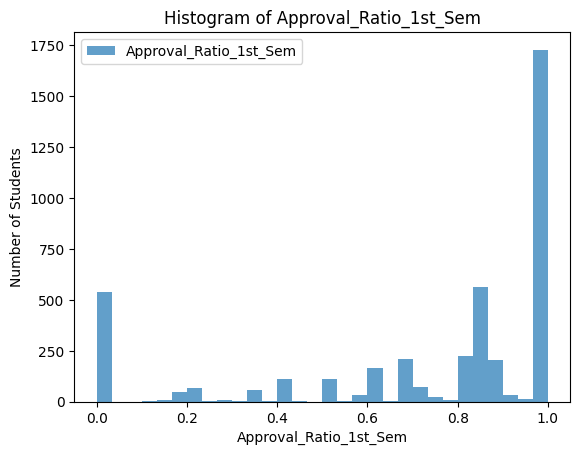

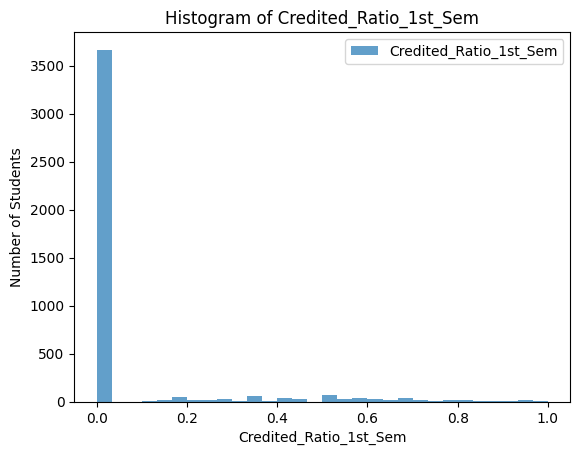

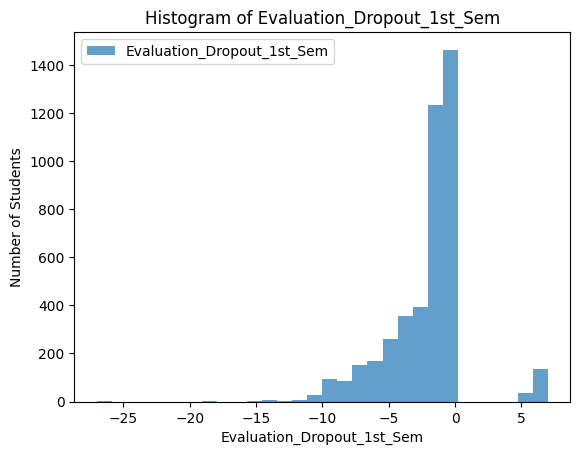

In [26]:
features_to_plot = ['Approval_Ratio_1st_Sem', 'Credited_Ratio_1st_Sem', 'Evaluation_Dropout_1st_Sem']

for feature in features_to_plot:
    plt.hist(df_school[feature], bins=30, alpha=0.7, label=feature)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Students')
    plt.legend()
    plt.show()


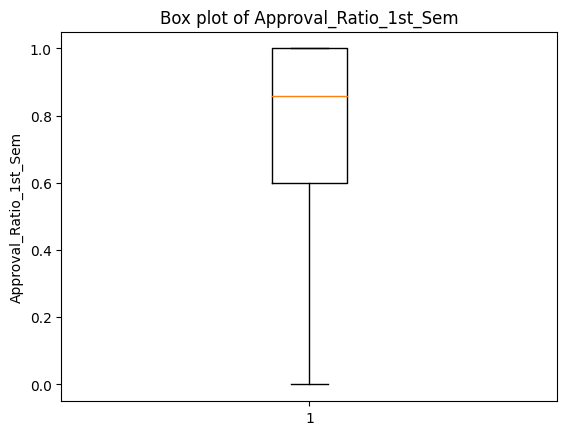

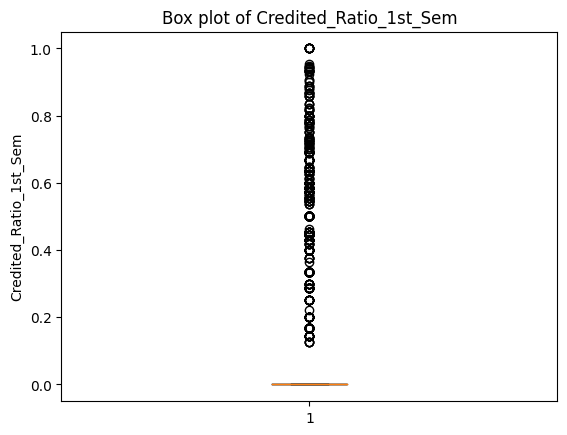

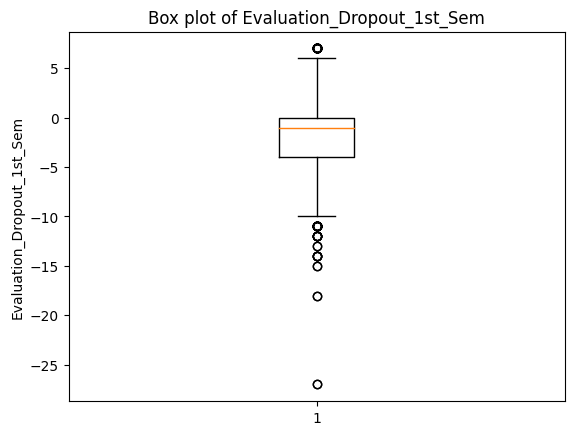

In [27]:
for feature in features_to_plot:
    plt.boxplot(df_school[feature].dropna())
    plt.title(f'Box plot of {feature}')
    plt.ylabel(feature)
    plt.show()


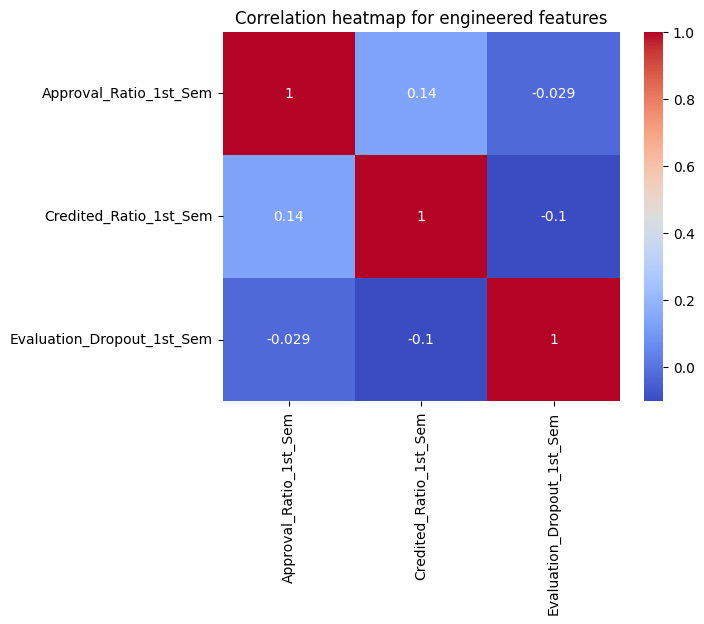

In [28]:
correlation_matrix = df_school[features_to_plot].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap for engineered features')
plt.show()


### Relationship between parent's qualification/occupation and student's likelihood of graduating or dropping out.

In [36]:
qualification_mapping = {
    1: 'Secondary Education',
    2: 'Higher Education - Undergraduate',
    3: 'Higher Education - Undergraduate',
    4: 'Higher Education - Graduate',
    5: 'Higher Education - Graduate',
    6: 'Higher Education - Undergraduate',
    7: 'Primary Education',
    8: 'Primary Education',
    9: 'Primary Education',
    10: 'Secondary Education',
    11: 'Secondary Education',
    12: 'Secondary Education',
    13: 'Secondary Education',
    14: 'Secondary Education',
    15: 'Secondary Education',
    16: 'Vocational/Technical',
    17: 'Secondary Education',
    18: 'Primary Education',
    19: 'Secondary Education',
    20: 'Primary Education',
    21: 'Primary Education',
    22: 'Secondary Education',
    23: 'Secondary Education',
    24: 'Unknown',
    25: 'Primary Education',
    26: 'Primary Education',
    27: 'Primary Education',
    28: 'Primary Education',
    29: 'Vocational/Technical',
    30: 'Higher Education - Undergraduate',
    31: 'Higher Education - Undergraduate',
    32: 'Higher Education - Undergraduate',
    33: 'Higher Education - Graduate',
    34: 'Higher Education - Graduate'
}

# Grouping the qualification categories
grouped_qualifications = {
    'Primary Education': 'Primary Education',
    'Secondary Education': 'Secondary Education',
    'Higher Education - Undergraduate': 'Higher Education',
    'Higher Education - Graduate': 'Higher Education',
    'Vocational/Technical': 'Vocational/Technical',
    'Unknown': 'Unknown'
}




In [39]:
# First, map the numerical values to their respective labels
df_school["Father's Qualification"] = df_school["Father's qualification"].map(qualification_mapping)

# Now, group the qualifications
df_school["Father's Qualification Group"] = df_school["Father's Qualification"].replace(grouped_qualifications)


In [40]:
df_school["Father's Qualification Group"].unique()

array(['Secondary Education', 'Higher Education', 'Primary Education',
       'Unknown', 'Vocational/Technical'], dtype=object)

In [41]:
# Group by the new category and get the count of 'Target' values
dropout_counts = df_school[df_school['Target'] == 'Dropout'].groupby("Father's Qualification Group")['Target'].count()
total_counts = df_school.groupby("Father's Qualification Group")['Target'].count()

dropout_rates = (dropout_counts / total_counts) * 100


In [42]:
dropout_rates

Father's Qualification Group
Higher Education        34.047619
Primary Education       31.741140
Secondary Education     29.515877
Unknown                 72.321429
Vocational/Technical    50.000000
Name: Target, dtype: float64

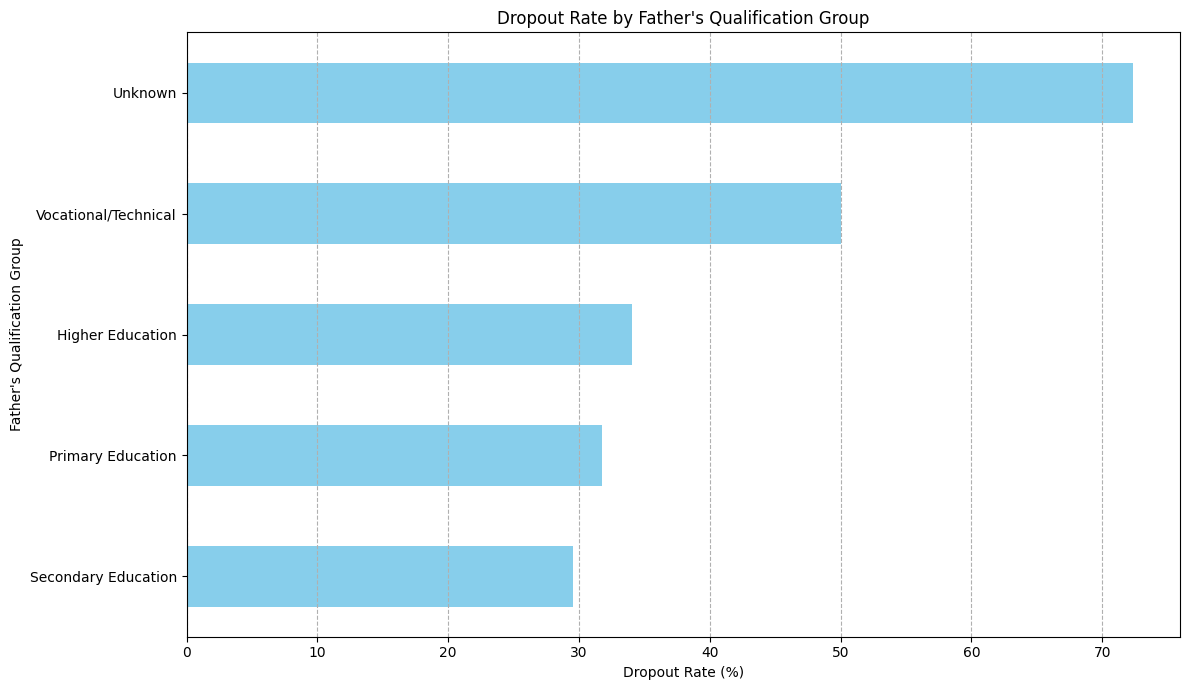

In [43]:
plt.figure(figsize=(12, 7))
dropout_rates.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Dropout Rate (%)')
plt.ylabel("Father's Qualification Group")
plt.title("Dropout Rate by Father's Qualification Group")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


In [47]:
# Create 'Mother's Qualification Category' column by mapping the 'Mother's qualification' column
df_school["Mother's Qualification Category"] = df_school["Mother's qualification"].map(qualification_mapping)

# Now, group the qualifications
df_school["Mother's Qualification Category"] = df_school["Mother's Qualification Category"].replace(grouped_qualifications)


In [48]:
# Group by the new category and get the count of 'Target' values
dropout_counts = df_school[df_school['Target'] == 'Dropout'].groupby("Mother's Qualification Category")['Target'].count()
total_counts = df_school.groupby("Mother's Qualification Category")['Target'].count()

dropout_rates = (dropout_counts / total_counts) * 100


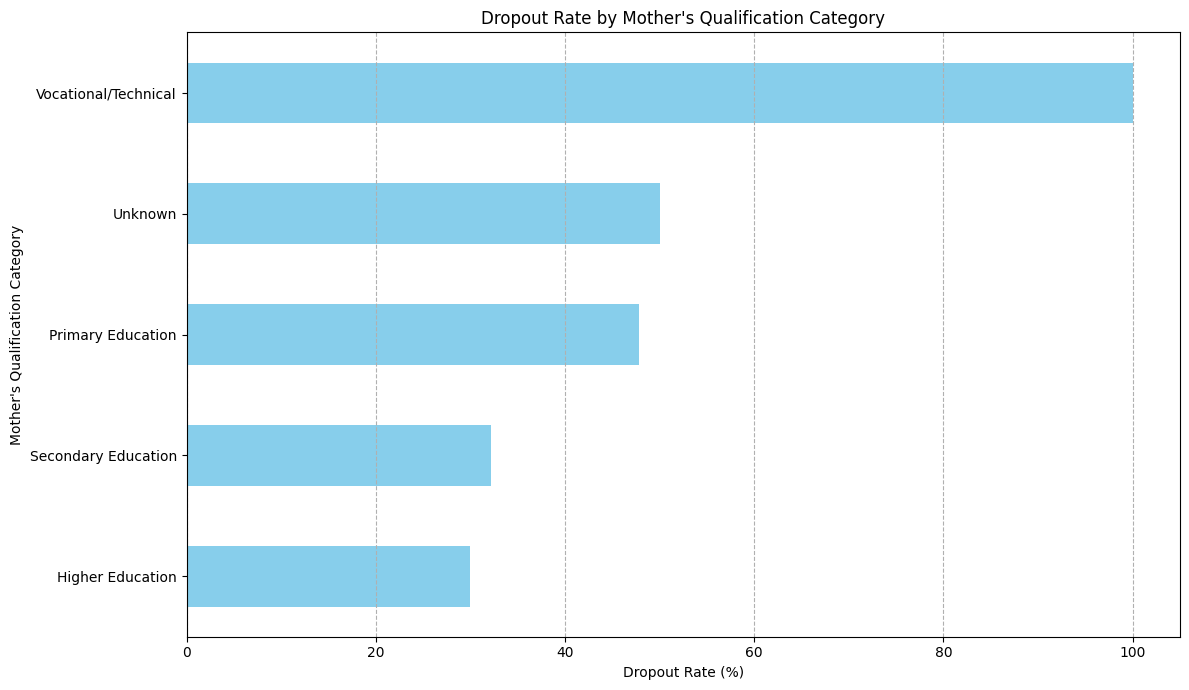

In [49]:
plt.figure(figsize=(12, 7))
dropout_rates.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Dropout Rate (%)')
plt.ylabel("Mother's Qualification Category")
plt.title("Dropout Rate by Mother's Qualification Category")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


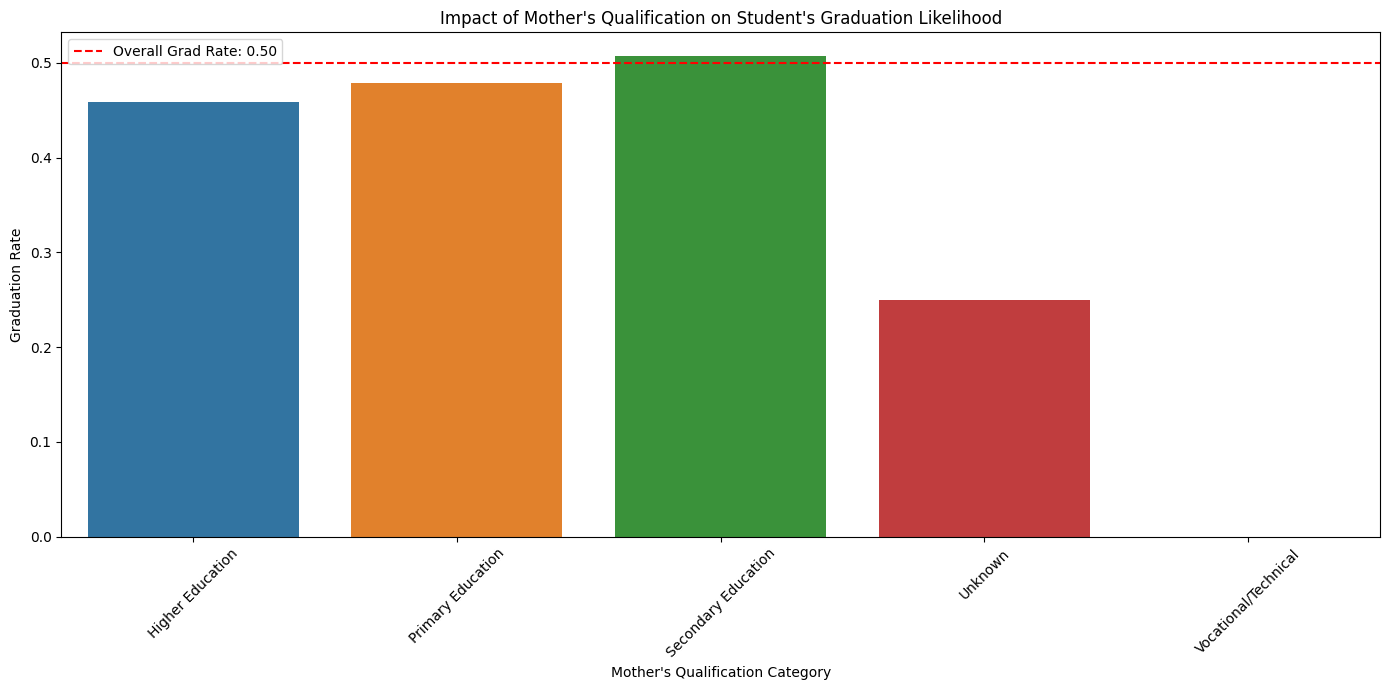

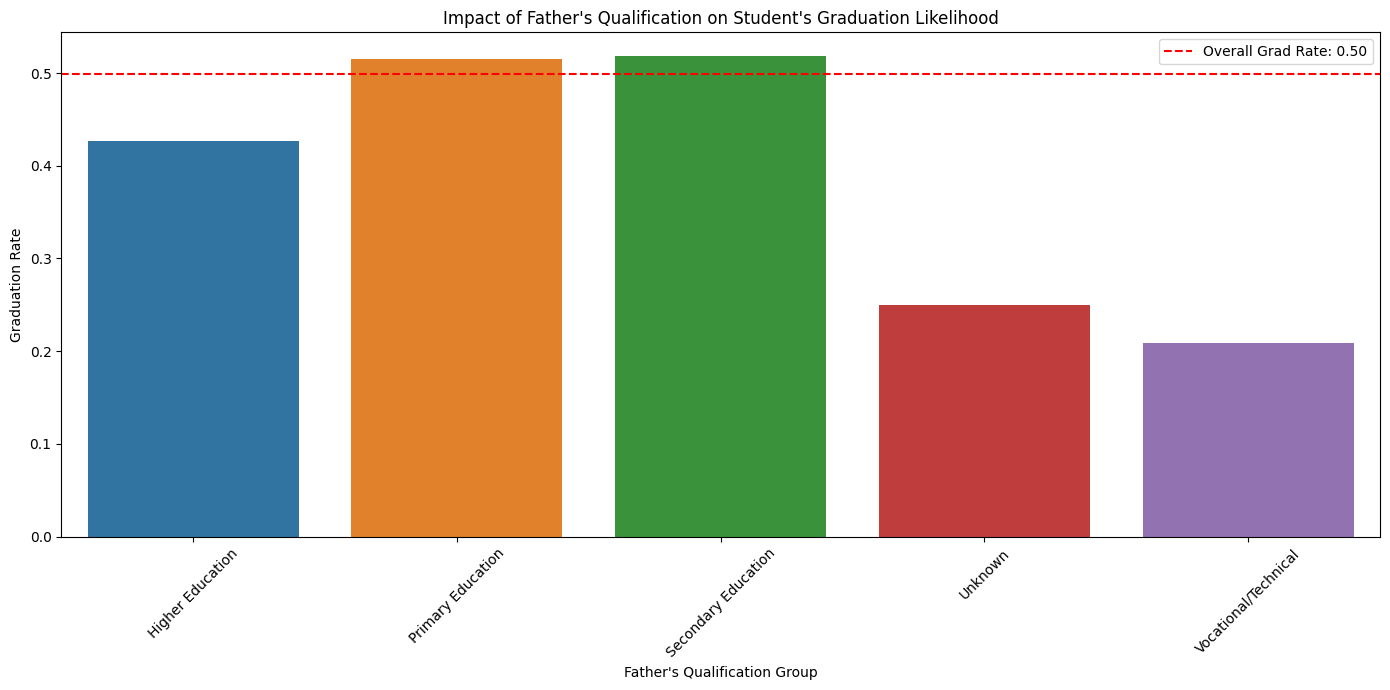

Chi-squared Test Result for Mother's Qualification: Statistic = 32.24, P-value = 0.0001
Chi-squared Test Result for Father's Qualification: Statistic = 113.18, P-value = 0.0000


In [51]:
from scipy.stats import chi2_contingency

# Overall graduation rate
overall_grad_rate = (df_school['Target'] == 'Graduate').mean()

# Calculate graduation rates for each of the "Mother's Qualification Group" categories
mothers_qualification_grad_rate = df_school[df_school['Target'] == 'Graduate'].groupby("Mother's Qualification Category").size() / df_school.groupby("Mother's Qualification Category").size()
mothers_qualification_grad_rate = mothers_qualification_grad_rate.reset_index().rename(columns={0: 'Graduation Rate'})

# Similarly for fathers
fathers_qualification_grad_rate = df_school[df_school['Target'] == 'Graduate'].groupby("Father's Qualification Group").size() / df_school.groupby("Father's Qualification Group").size()
fathers_qualification_grad_rate = fathers_qualification_grad_rate.reset_index().rename(columns={0: 'Graduation Rate'})

# Create contingency tables for Chi-squared test based on the new groupings
contingency_mother = pd.crosstab(df_school["Mother's Qualification Category"], df_school['Target'])
contingency_father = pd.crosstab(df_school["Father's Qualification Group"], df_school['Target'])

# Performing the Chi-squared test
chi2_stat_mother, p_val_mother, _, _ = chi2_contingency(contingency_mother)
chi2_stat_father, p_val_father, _, _ = chi2_contingency(contingency_father)

# Visualization for mothers
plt.figure(figsize=(14, 7))
sns.barplot(data=mothers_qualification_grad_rate, x="Mother's Qualification Category", y='Graduation Rate')
plt.axhline(overall_grad_rate, color='red', linestyle='--', label=f"Overall Grad Rate: {overall_grad_rate:.2f}")
plt.title("Impact of Mother's Qualification on Student's Graduation Likelihood")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization for fathers
plt.figure(figsize=(14, 7))
sns.barplot(data=fathers_qualification_grad_rate, x="Father's Qualification Group", y='Graduation Rate')
plt.axhline(overall_grad_rate, color='red', linestyle='--', label=f"Overall Grad Rate: {overall_grad_rate:.2f}")
plt.title("Impact of Father's Qualification on Student's Graduation Likelihood")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the Chi-squared test results
print(f"Chi-squared Test Result for Mother's Qualification: Statistic = {chi2_stat_mother:.2f}, P-value = {p_val_mother:.4f}")
print(f"Chi-squared Test Result for Father's Qualification: Statistic = {chi2_stat_father:.2f}, P-value = {p_val_father:.4f}")


There is a strong statistical association between the qualifications of parents and the outcome variable being studied.

The Chi-squared statistic measures the degree of deviation from what would be expected if there were no relationship between parental qualifications and the outcome. The statistics (34.43 for mothers and 116.19 for fathers) are relatively high, indicating substantial deviations.

The p-values (0.0002 for mothers and 0.0000 for fathers) are very low, which means there is very strong evidence that parental qualifications are significantly related to the outcome. These results strongly reject the null hypothesis that there is no association between parental qualifications and the outcome variable.

### Courses with the highest dropout rates and those with predominant success.

In [52]:
# Mapping courses
course_mapping = {
    1: 'Biofuel Production Technologies',
    2: 'Animation and Multimedia Design',
    3: 'Social Service (evening attendance)',
    4: 'Agronomy',
    5: 'Communication Design',
    6: 'Veterinary Nursing',
    7: 'Informatics Engineering',
    8: 'Equiniculture',
    9: 'Management',
    10: 'Social Service',
    11: 'Tourism',
    12: 'Nursing',
    13: 'Oral Hygiene',
    14: 'Advertising and Marketing Management',
    15: 'Journalism and Communication',
    16: 'Basic Education',
    17: 'Management (evening attendance)'
}

df_school['Course Name'] = df_school['Course'].map(course_mapping)

# Calculate dropout and success rates by course
course_rates = df_school.groupby('Course Name').apply(lambda x: pd.Series({
    'Dropout Rate': (x['Target'] == 'Dropout').mean(),
    'Success Rate': (x['Target'] == 'Graduate').mean()
})).reset_index()

# Identify courses with the highest dropout rates
highest_dropout_courses = course_rates.sort_values(by='Dropout Rate', ascending=False).head()

# Identify courses with the highest success rates
highest_success_courses = course_rates.sort_values(by='Success Rate', ascending=False).head()

print("Courses with the highest dropout rates:")
print(highest_dropout_courses)

print("\nCourses with predominant success:")
print(highest_success_courses)


Courses with the highest dropout rates:
                        Course Name  Dropout Rate  Success Rate
4   Biofuel Production Technologies      0.666667      0.083333
6                     Equiniculture      0.553191      0.297872
7           Informatics Engineering      0.541176      0.082353
10  Management (evening attendance)      0.507463      0.291045
3                   Basic Education      0.442708      0.296875

Courses with predominant success:
                            Course Name  Dropout Rate  Success Rate
11                              Nursing      0.154047      0.715405
13                       Social Service      0.183099      0.698592
8          Journalism and Communication      0.305136      0.592145
5                  Communication Design      0.225664      0.588496
14  Social Service (evening attendance)      0.330233      0.572093


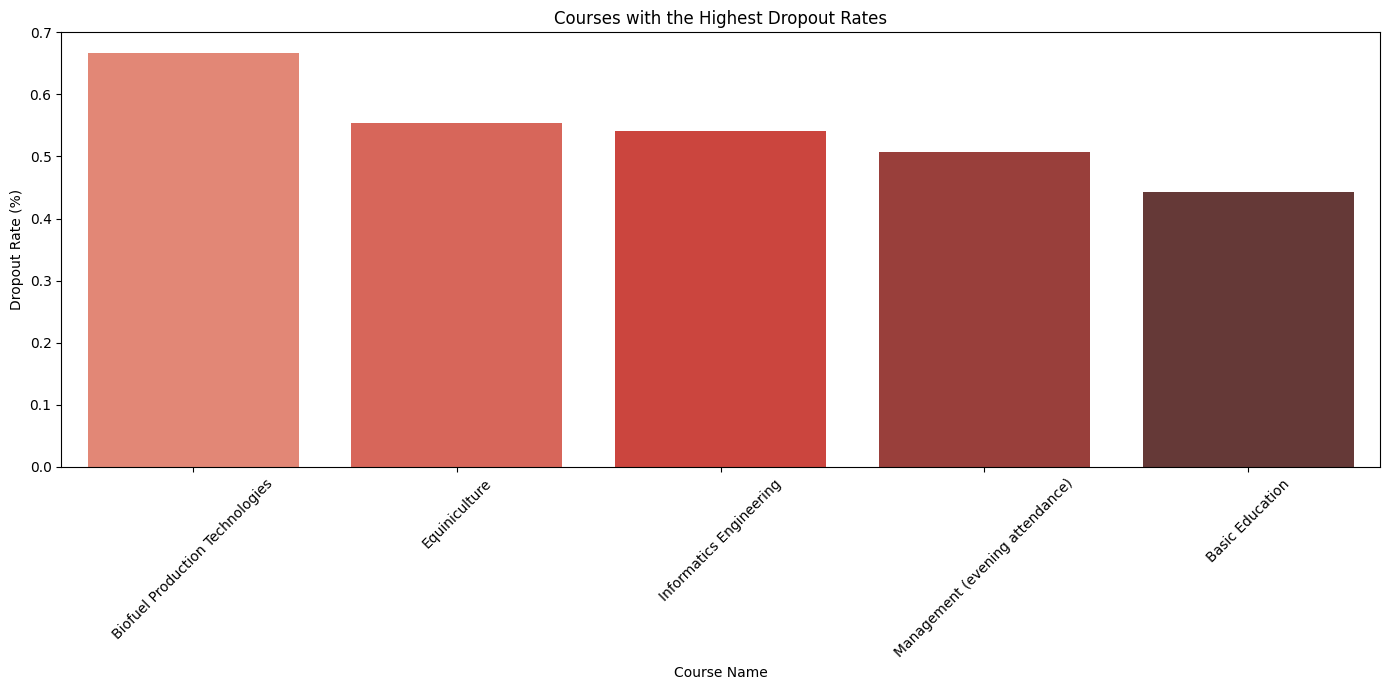

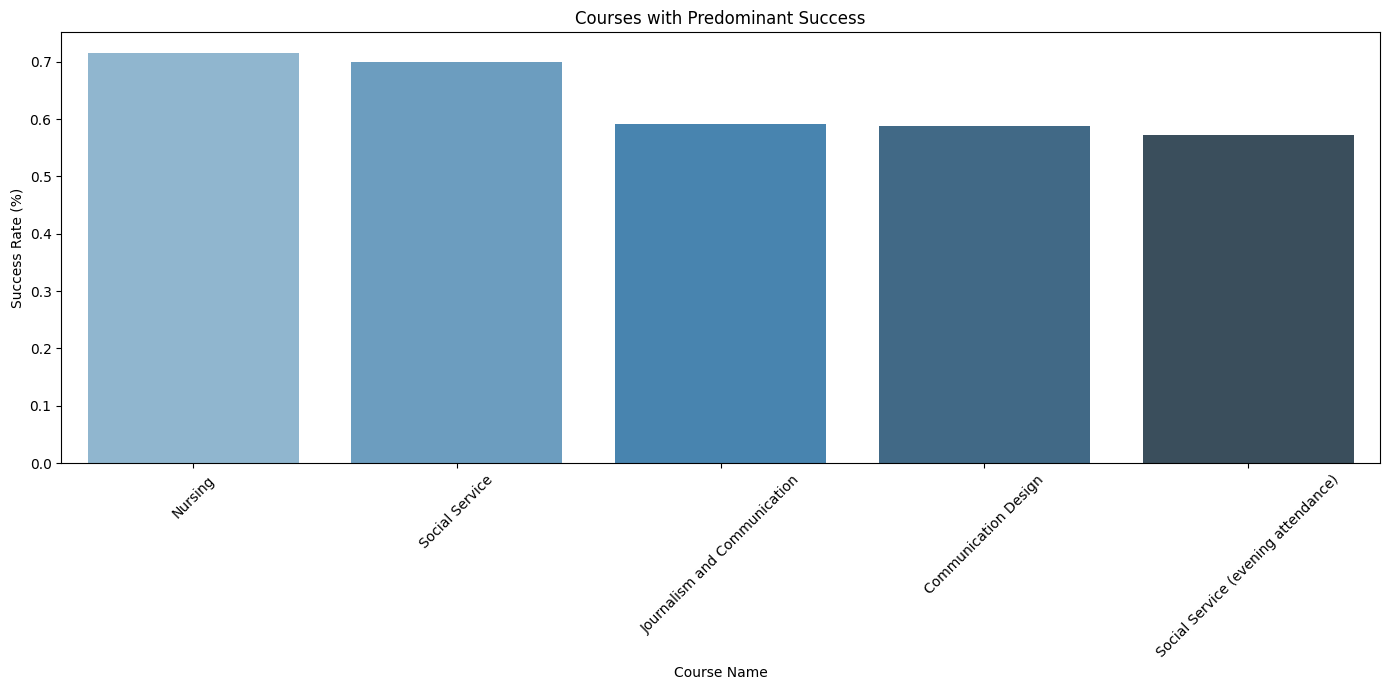

In [53]:

# Visualization for courses with the highest dropout rates
plt.figure(figsize=(14, 7))
sns.barplot(data=highest_dropout_courses, x='Course Name', y='Dropout Rate', palette="Reds_d")
plt.title("Courses with the Highest Dropout Rates")
plt.xticks(rotation=45)
plt.ylabel('Dropout Rate (%)')
plt.tight_layout()
plt.show()

# Visualization for courses with the highest success rates
plt.figure(figsize=(14, 7))
sns.barplot(data=highest_success_courses, x='Course Name', y='Success Rate', palette="Blues_d")
plt.title("Courses with Predominant Success")
plt.xticks(rotation=45)
plt.ylabel('Success Rate (%)')
plt.tight_layout()
plt.show()


### Impact of daytime/evening attendance on student performance.

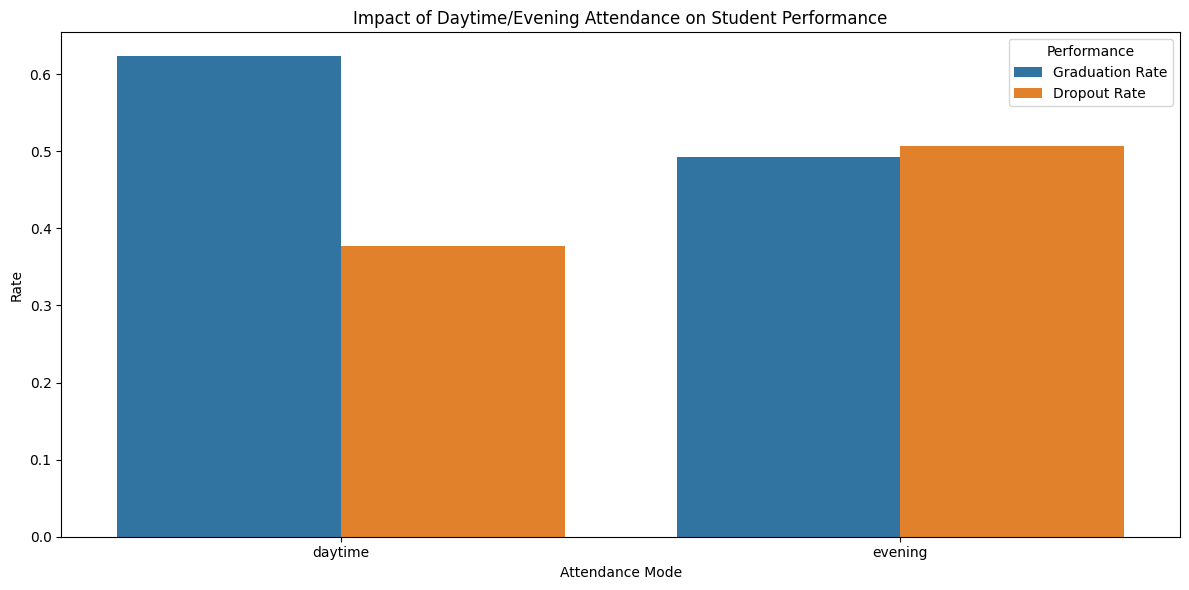

In [54]:
# Mapping 'Daytime/evening attendance' column
df_school['Daytime/evening attendance'] = df_school['Daytime/evening attendance'].replace({1: 'daytime', 0: 'evening'})

# Create a crosstab table of 'Daytime/evening attendance' vs 'Target'
attendance_vs_performance = pd.crosstab(df_school['Daytime/evening attendance'], df_school['Target'])

# Calculate rates
attendance_vs_performance['Graduation Rate'] = attendance_vs_performance['Graduate'] / (attendance_vs_performance['Graduate'] + attendance_vs_performance['Dropout'])
attendance_vs_performance['Dropout Rate'] = attendance_vs_performance['Dropout'] / (attendance_vs_performance['Graduate'] + attendance_vs_performance['Dropout'])

# Melt dataframe for visualization
melted_df = attendance_vs_performance[['Graduation Rate', 'Dropout Rate']].reset_index().melt(id_vars='Daytime/evening attendance', value_name='Rate', var_name='Performance')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Daytime/evening attendance', y='Rate', hue='Performance')
plt.title("Impact of Daytime/Evening Attendance on Student Performance")
plt.ylabel("Rate")
plt.xlabel("Attendance Mode")
plt.legend(title='Performance')
plt.tight_layout()
plt.show()


#### Comparing the distribution of grades between daytime and evening students

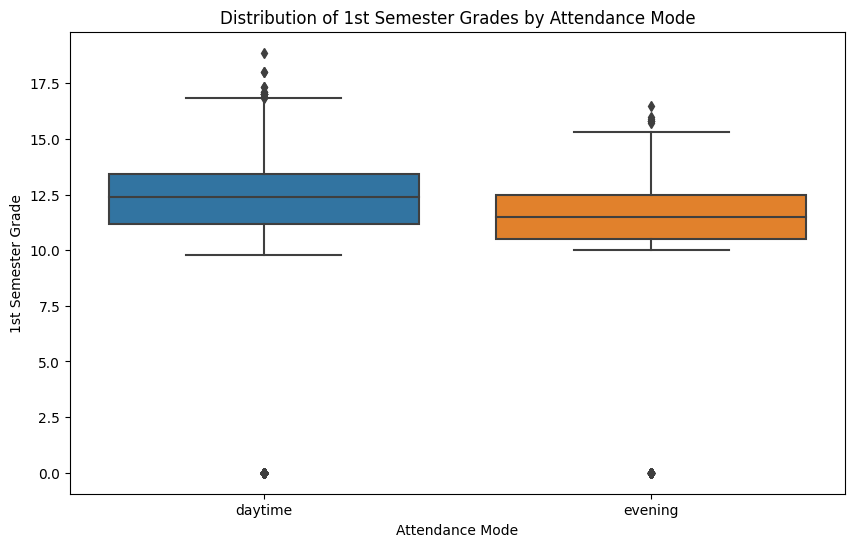

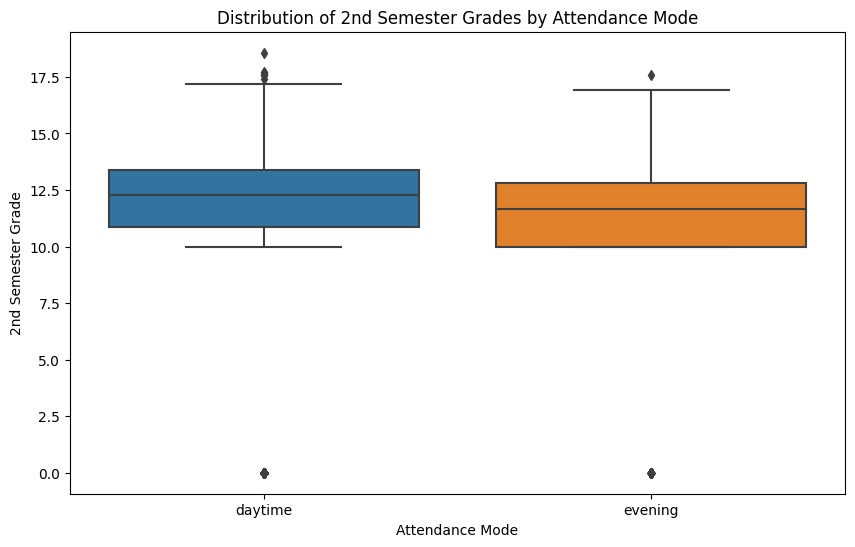

In [55]:

# Grades distribution for 1st semester
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_school, x='Daytime/evening attendance', y='Curricular units 1st sem (grade)')
plt.title("Distribution of 1st Semester Grades by Attendance Mode")
plt.ylabel("1st Semester Grade")
plt.xlabel("Attendance Mode")
plt.show()

# Grades distribution for 2nd semester
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_school, x='Daytime/evening attendance', y='Curricular units 2nd sem (grade)')
plt.title("Distribution of 2nd Semester Grades by Attendance Mode")
plt.ylabel("2nd Semester Grade")
plt.xlabel("Attendance Mode")
plt.show()


####  Examining the distribution of other factors between daytime and evening students

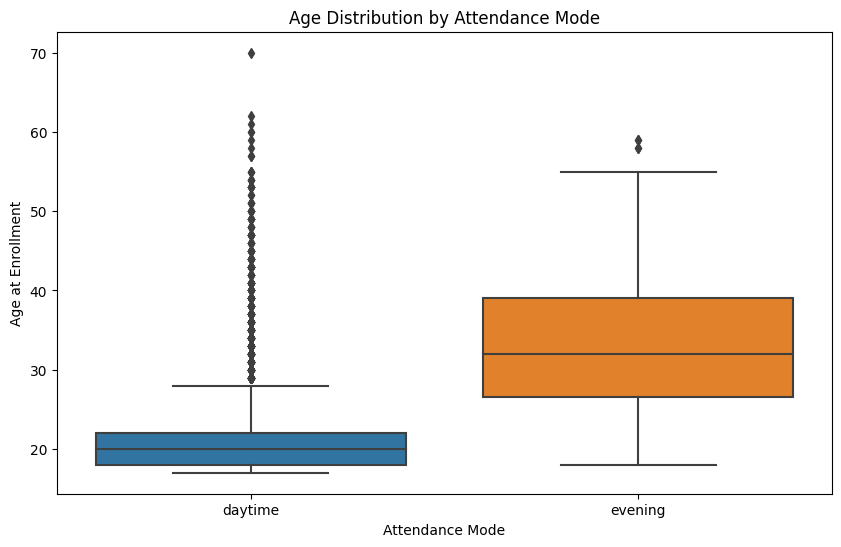

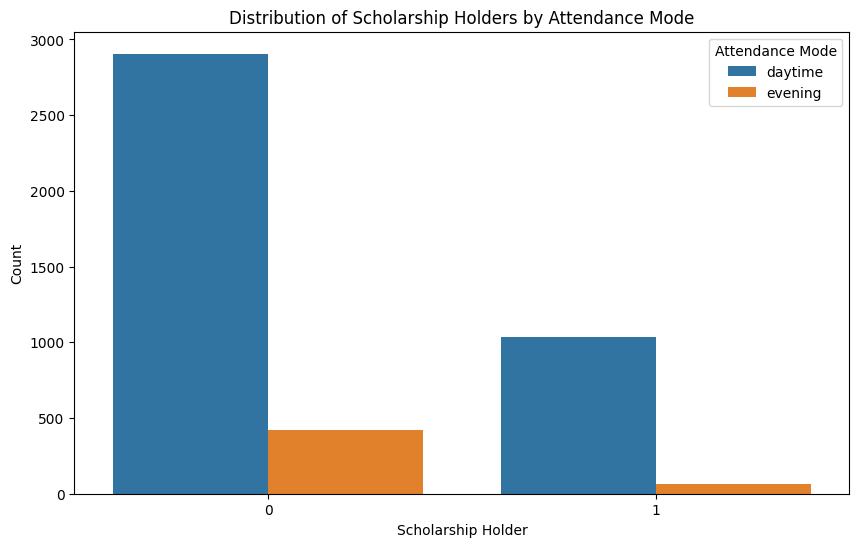

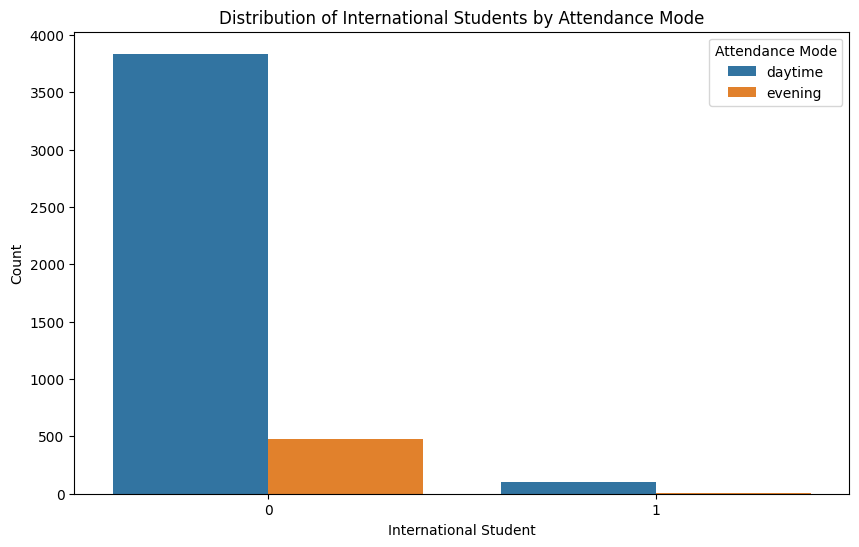

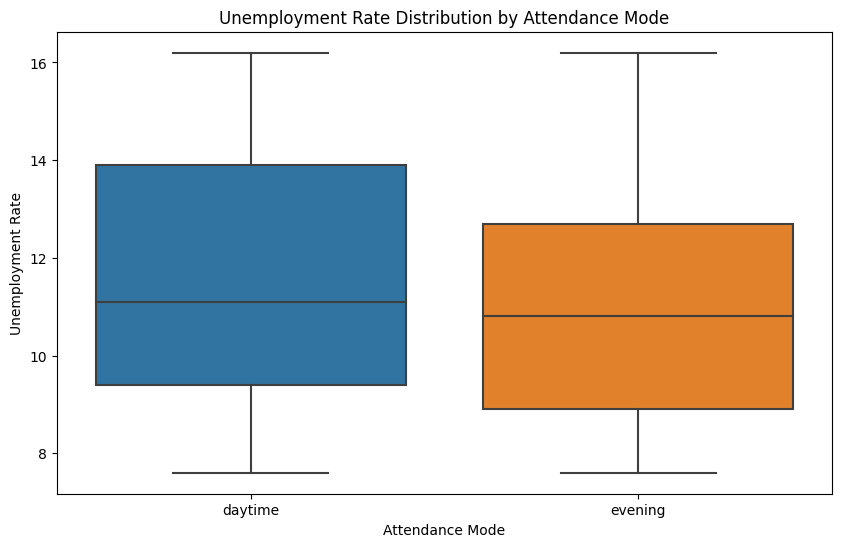

In [56]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_school, x='Daytime/evening attendance', y='Age at enrollment')
plt.title("Age Distribution by Attendance Mode")
plt.ylabel("Age at Enrollment")
plt.xlabel("Attendance Mode")
plt.show()

# Scholarship status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_school, x='Scholarship holder', hue='Daytime/evening attendance')
plt.title("Distribution of Scholarship Holders by Attendance Mode")
plt.xlabel("Scholarship Holder")
plt.ylabel("Count")
plt.legend(title="Attendance Mode")
plt.show()

# Distribution of International Students
plt.figure(figsize=(10, 6))
sns.countplot(data=df_school, x='International', hue='Daytime/evening attendance')
plt.title("Distribution of International Students by Attendance Mode")
plt.xlabel("International Student")
plt.ylabel("Count")
plt.legend(title="Attendance Mode")
plt.show()

# Unemployment rate distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_school, x='Daytime/evening attendance', y='Unemployment rate')
plt.title("Unemployment Rate Distribution by Attendance Mode")
plt.ylabel("Unemployment Rate")
plt.xlabel("Attendance Mode")
plt.show()


#### Comparing dropout rates across different courses or other categorical variables between daytime and evening students

<Figure size 1500x700 with 0 Axes>

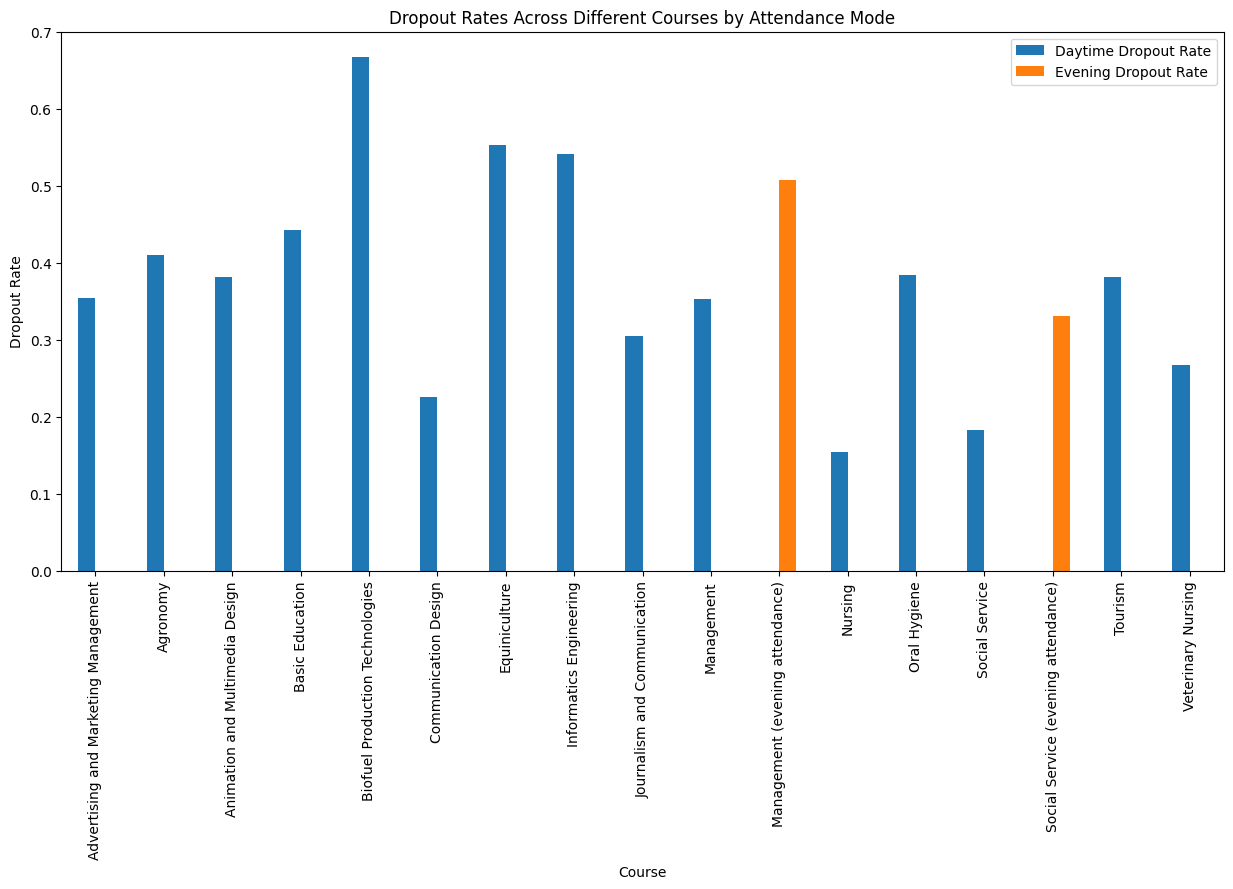

In [57]:
# Dropout rates across different courses
course_dropout_rates = pd.crosstab(df_school['Course Name'], [df_school['Target'], df_school['Daytime/evening attendance']], normalize='index')["Dropout"]
course_dropout_rates = course_dropout_rates.reset_index()
course_dropout_rates.columns = ['Course Name', 'Daytime Dropout Rate', 'Evening Dropout Rate']

plt.figure(figsize=(15, 7))
course_dropout_rates.set_index('Course Name').plot(kind='bar', figsize=(15,7))
plt.title("Dropout Rates Across Different Courses by Attendance Mode")
plt.ylabel("Dropout Rate")
plt.xlabel("Course")
plt.show()


#### Relationship between scholarship holding status and dropout rate.

In [58]:
# Generate a contingency table
scholarship_vs_target = pd.crosstab(df_school['Scholarship holder'], df_school['Target'])

# Calculate dropout rates
scholarship_vs_target['Dropout Rate'] = scholarship_vs_target['Dropout'] / (scholarship_vs_target['Dropout'] + scholarship_vs_target['Graduate'])
print(scholarship_vs_target)


Target              Dropout  Enrolled  Graduate  Dropout Rate
Scholarship holder                                           
0                      1287       664      1374      0.483653
1                       134       130       835      0.138287


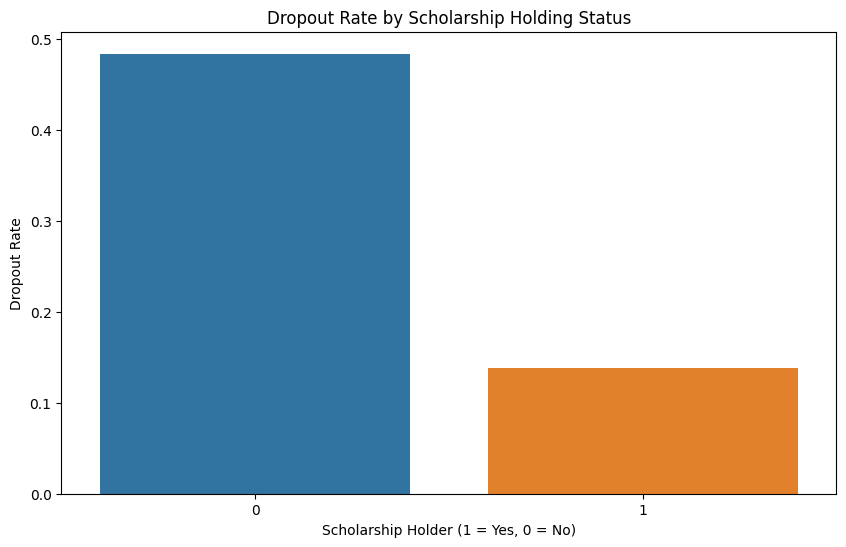

In [59]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=scholarship_vs_target.index, y=scholarship_vs_target['Dropout Rate'])
plt.title('Dropout Rate by Scholarship Holding Status')
plt.xlabel('Scholarship Holder (1 = Yes, 0 = No)')
plt.ylabel('Dropout Rate')
plt.show()


#### Gender distribution among scholarship holders:

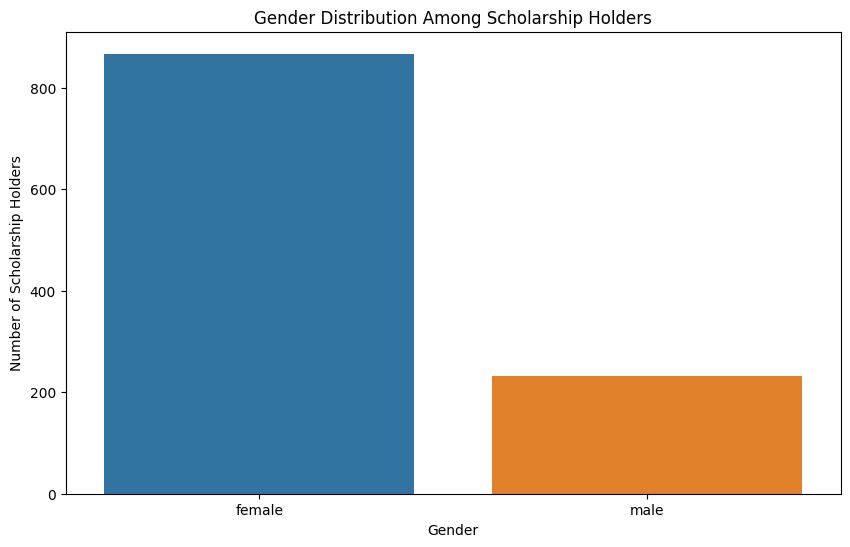

In [60]:
# Generate a crosstab table
gender_scholarship_ct = pd.crosstab(df_school['Gender'], df_school['Scholarship holder'])

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_scholarship_ct.index, y=gender_scholarship_ct[1])  # 1 denotes scholarship holders
plt.title('Gender Distribution Among Scholarship Holders')
plt.xlabel('Gender')
plt.ylabel('Number of Scholarship Holders')
plt.show()


#### Distribution of international students with respect to scholarships:

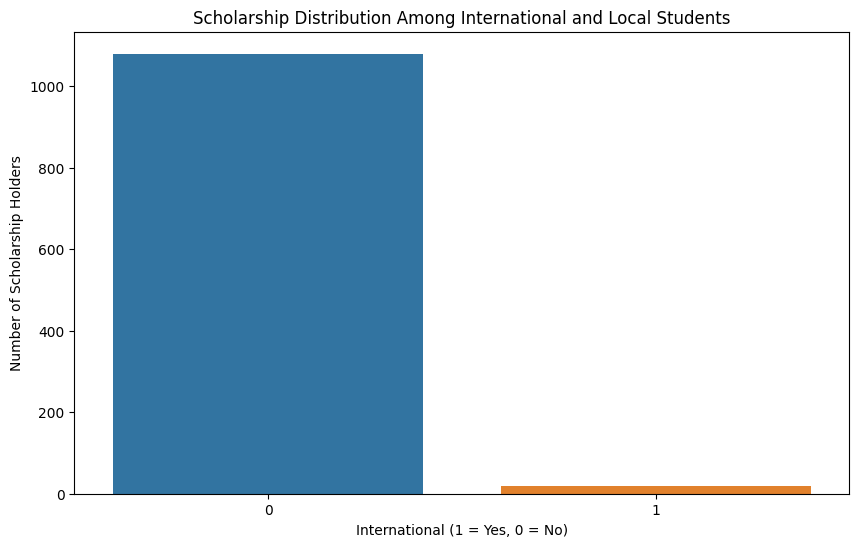

In [61]:
# Crosstab table for international students and scholarship distribution
international_scholarship_ct = pd.crosstab(df_school['International'], df_school['Scholarship holder'])

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=international_scholarship_ct.index, y=international_scholarship_ct[1])  # 1 denotes scholarship holders
plt.title('Scholarship Distribution Among International and Local Students')
plt.xlabel('International (1 = Yes, 0 = No)')
plt.ylabel('Number of Scholarship Holders')
plt.show()


#### Relationship of scholarships with dropout rate among different categories

In [63]:
# Create a crosstab table for Gender, Scholarship and Target
gender_scholarship_target = pd.crosstab([df_school['Gender'], df_school['Scholarship holder']], df_school['Target'])
gender_scholarship_target['Dropout Rate'] = gender_scholarship_target['Dropout'] / (gender_scholarship_target['Dropout'] + gender_scholarship_target['Graduate'])



#### Visualization for Gender, Scholarship, and Dropout rate:

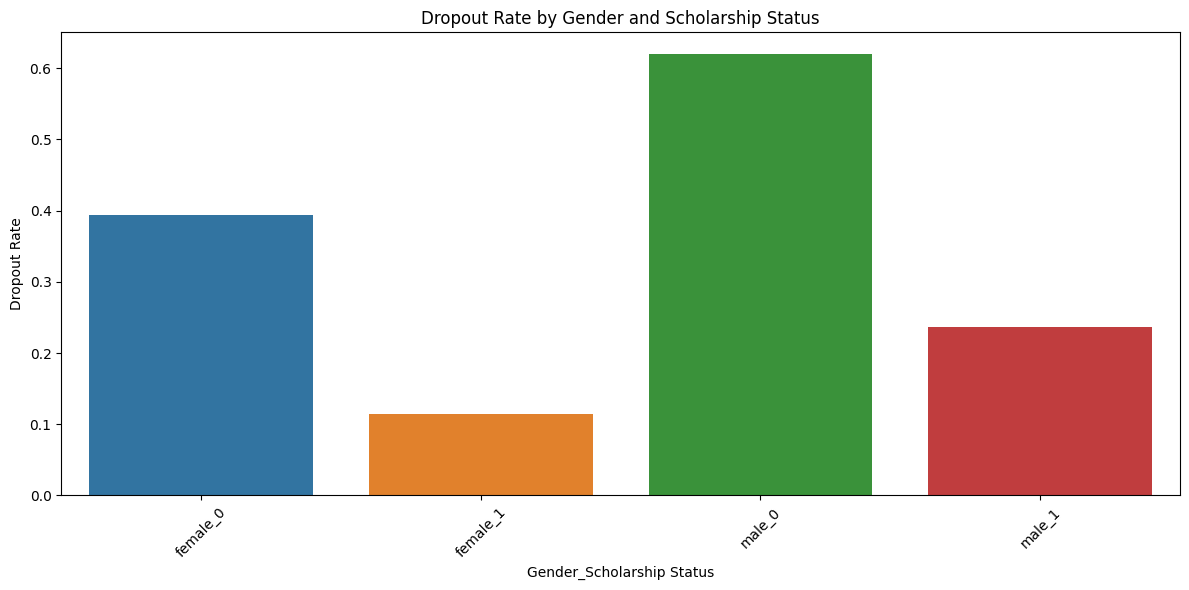

In [64]:
# Simplify index for visualization
gender_scholarship_target.reset_index(inplace=True)
gender_scholarship_target['Index'] = gender_scholarship_target['Gender'] + "_" + gender_scholarship_target['Scholarship holder'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x=gender_scholarship_target['Index'], y=gender_scholarship_target['Dropout Rate'])
plt.title('Dropout Rate by Gender and Scholarship Status')
plt.xlabel('Gender_Scholarship Status')
plt.ylabel('Dropout Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Visualization for International Status, Scholarship, and Dropout rate:

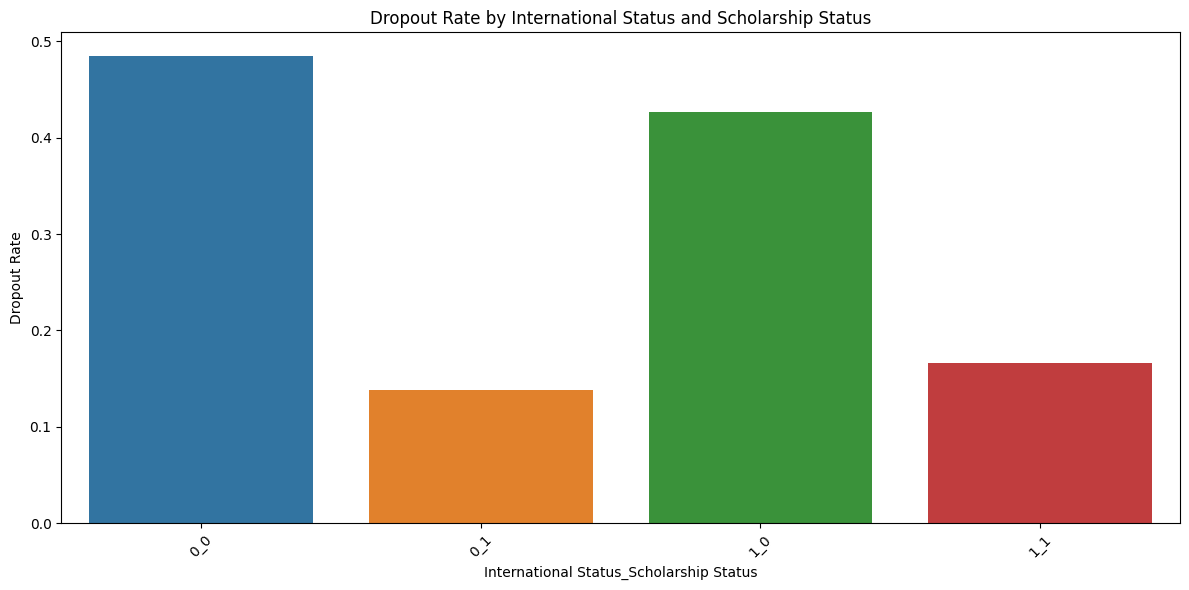

In [66]:
# Create a crosstab table for International status, Scholarship and Target
international_scholarship_target = pd.crosstab([df_school['International'], df_school['Scholarship holder']], df_school['Target'])
international_scholarship_target['Dropout Rate'] = international_scholarship_target['Dropout'] / (international_scholarship_target['Dropout'] + international_scholarship_target['Graduate'])

# Simplify index for visualization
international_scholarship_target.reset_index(inplace=True)
international_scholarship_target['Index'] = international_scholarship_target['International'].astype(str) + "_" + international_scholarship_target['Scholarship holder'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x=international_scholarship_target['Index'], y=international_scholarship_target['Dropout Rate'])
plt.title('Dropout Rate by International Status and Scholarship Status')
plt.xlabel('International Status_Scholarship Status')
plt.ylabel('Dropout Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Influence of being a debtor on dropout rate. Impact of keeping tuition fees up-to-date.

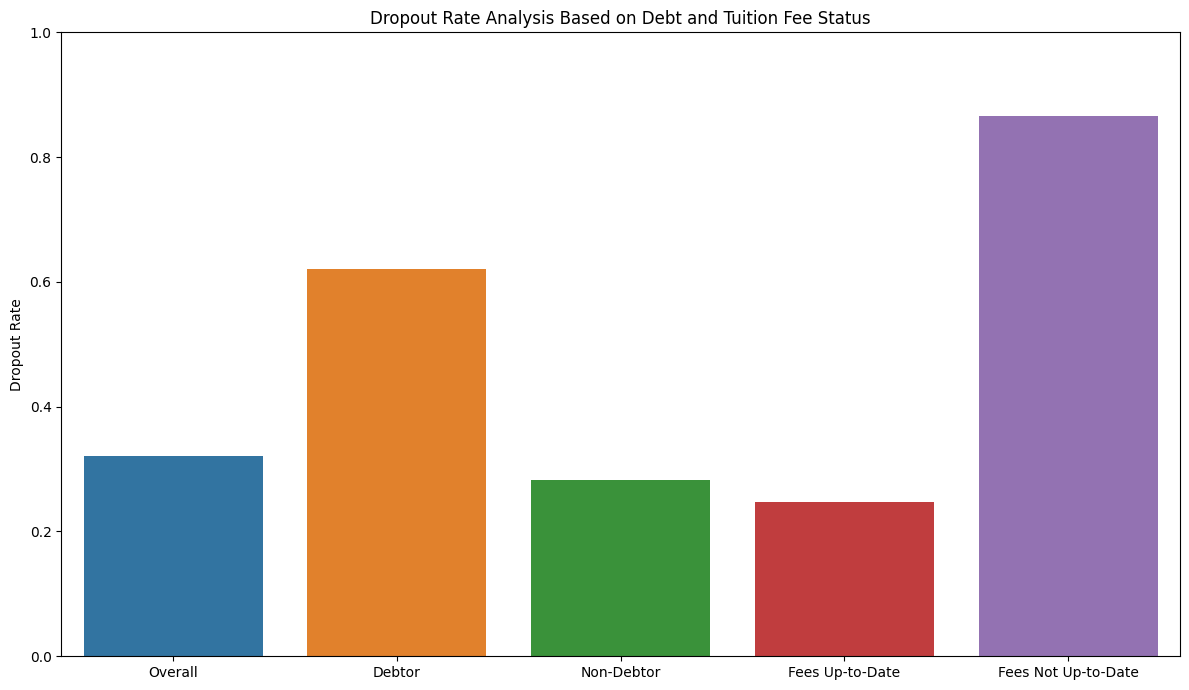

Chi-squared Test Result for Debtor Status: Statistic = 259.33, P-value = 0.0000
Chi-squared Test Result for Tuition Fees Up-to-Date: Statistic = 823.55, P-value = 0.0000


In [67]:
from scipy.stats import chi2_contingency

# 1. Overall Dropout Rate
overall_dropout_rate = (df_school['Target'] == 'Dropout').mean()

# 2. Dropout Rate Among Debtors vs. Non-Debtors
debtor_dropout = df_school[df_school['Debtor'] == 1]
non_debtor_dropout = df_school[df_school['Debtor'] == 0]

debtor_dropout_rate = (debtor_dropout['Target'] == 'Dropout').mean()
non_debtor_dropout_rate = (non_debtor_dropout['Target'] == 'Dropout').mean()

# 3. Dropout Rate Among Students with Up-to-Date Tuition Fees vs. Not
fees_updated = df_school[df_school['Tuition fees up to date'] == 1]
fees_not_updated = df_school[df_school['Tuition fees up to date'] == 0]

fees_updated_dropout_rate = (fees_updated['Target'] == 'Dropout').mean()
fees_not_updated_dropout_rate = (fees_not_updated['Target'] == 'Dropout').mean()

# 4. Visualization
# Using bar plots to visualize the dropout rates
labels = ['Overall', 'Debtor', 'Non-Debtor', 'Fees Up-to-Date', 'Fees Not Up-to-Date']
values = [overall_dropout_rate, debtor_dropout_rate, non_debtor_dropout_rate, fees_updated_dropout_rate, fees_not_updated_dropout_rate]

plt.figure(figsize=(12, 7))
sns.barplot(x=labels, y=values)
plt.ylabel('Dropout Rate')
plt.title('Dropout Rate Analysis Based on Debt and Tuition Fee Status')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 5. Statistical Significance: Chi-squared tests
contingency_debtor = pd.crosstab(df_school['Debtor'], df_school['Target'])
chi2_stat_debtor, p_val_debtor, _, _ = chi2_contingency(contingency_debtor)

contingency_fees = pd.crosstab(df_school['Tuition fees up to date'], df_school['Target'])
chi2_stat_fees, p_val_fees, _, _ = chi2_contingency(contingency_fees)

print(f"Chi-squared Test Result for Debtor Status: Statistic = {chi2_stat_debtor:.2f}, P-value = {p_val_debtor:.4f}")
print(f"Chi-squared Test Result for Tuition Fees Up-to-Date: Statistic = {chi2_stat_fees:.2f}, P-value = {p_val_fees:.4f}")


Debtor Status:

Statistic = 259.33: This indicates that the observed counts of dropouts (and other outcomes) for debtor vs. non-debtor students differ significantly from what we'd expect if being a debtor had no influence on dropout rates.

P-value = 0.0000: This p-value is less than typical significance levels (like 0.05), so we reject the null hypothesis. There is a statistically significant association between being a debtor and the dropout rate.

Tuition Fees Up-to-Date:

Statistic = 823.55: This indicates that the observed counts of dropouts for students with tuition fees up-to-date vs. not differ significantly from what we'd expect if tuition fee status had no influence on dropout rates.

P-value = 0.0000: Again, this p-value is less than typical significance levels, leading us to reject the null hypothesis. There's a statistically significant association between having tuition fees up-to-date and the dropout rate.

In Simple Terms:
Being a debtor has a statistically significant impact on whether a student drops out, graduates, or maintains some other status. Given the high chi-squared value and a p-value of 0, we can be very confident in this result.

Similarly, whether or not a student's tuition fees are up-to-date also has a significant impact on their status. Again, the high chi-squared value combined with a p-value of 0 gives us strong confidence in this finding.

### Correlation between average grades of 1st and 2nd semester and dropout rate.

In [68]:
# Calculate the average grade for each student
df_school['average_grade'] = (df_school['Curricular units 1st sem (grade)'] + df_school['Curricular units 2nd sem (grade)']) / 2

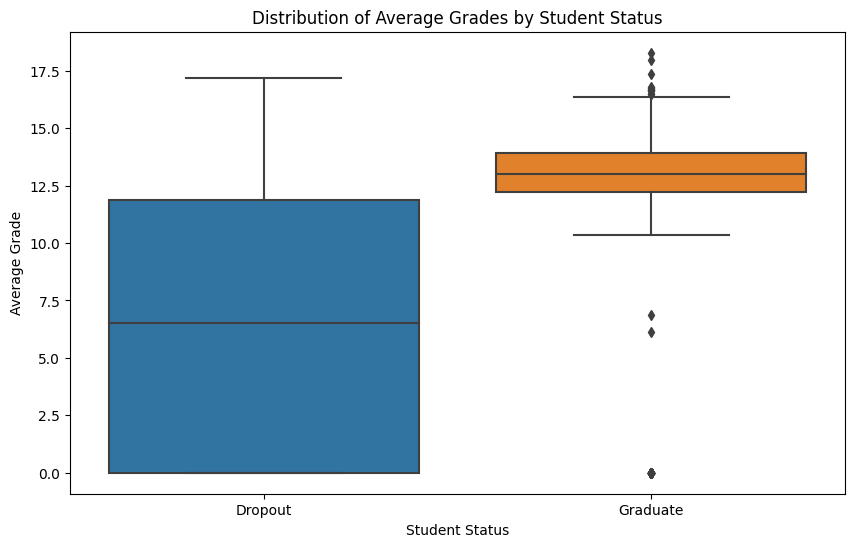

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='average_grade', data=df_school[df_school['Target'] != 'Enrolled'])
plt.title('Distribution of Average Grades by Student Status')
plt.ylabel('Average Grade')
plt.xlabel('Student Status')
plt.show()


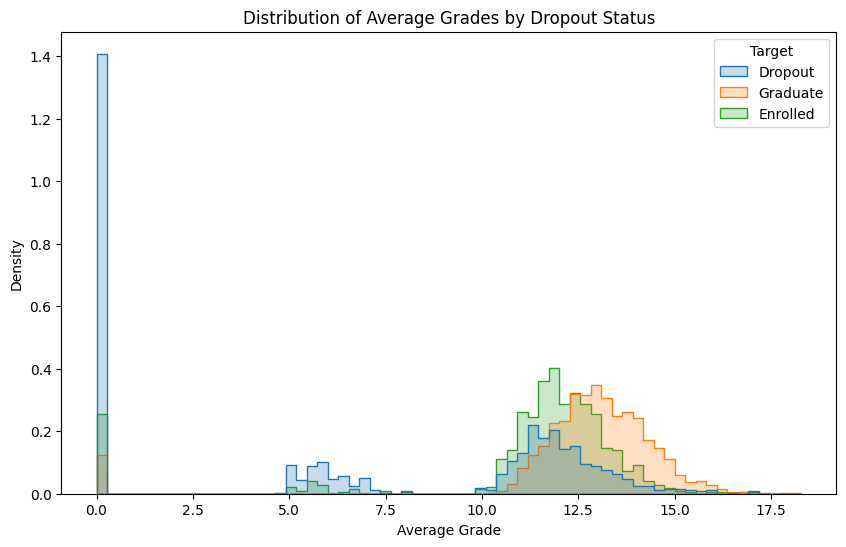

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df_school, x='average_grade', hue='Target', element="step", stat="density", common_norm=False)
plt.title("Distribution of Average Grades by Dropout Status")
plt.ylabel("Density")
plt.xlabel("Average Grade")
plt.show()


In [71]:
# Create a new column where Dropouts are represented by 1 and Graduates by 0
df_school['is_dropout'] = df_school['Target'].apply(lambda x: 1 if x == 'Dropout' else 0 if x == 'Graduate' else None)

# Compute the correlation
correlation = df_school[['average_grade', 'is_dropout']].dropna().corr().iloc[0, 1]

print(f"Pearson's correlation coefficient between average grades and dropout status: {correlation:.3f}")


Pearson's correlation coefficient between average grades and dropout status: -0.587


As the average grades of a student increase, the likelihood of them being a dropout decreases.

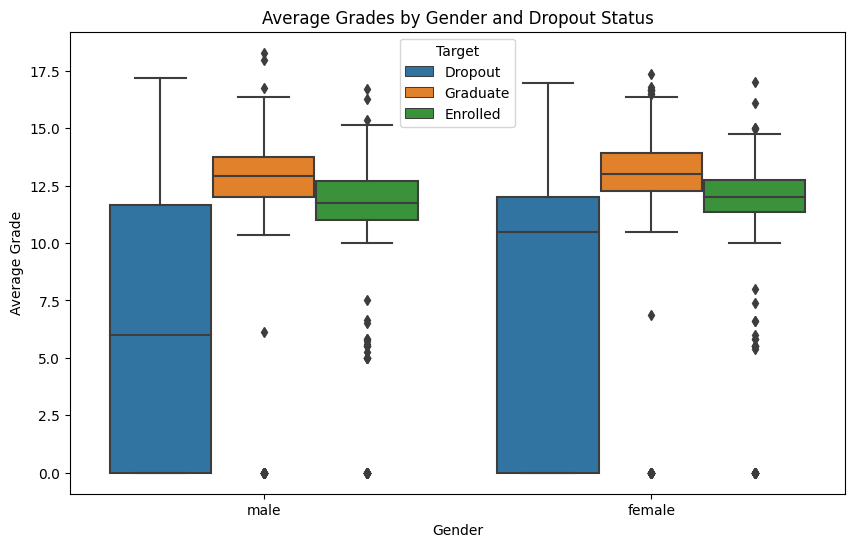

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_school, x='Gender', y='average_grade', hue='Target')
plt.title("Average Grades by Gender and Dropout Status")
plt.ylabel("Average Grade")
plt.xlabel("Gender")
plt.show()


In [73]:
from scipy.stats import ttest_ind

dropouts = df_school[df_school['Target'] == 'Dropout']['average_grade']
graduates = df_school[df_school['Target'] == 'Graduate']['average_grade']

t_stat, p_value = ttest_ind(dropouts, graduates)

print(f"T-test results: Statistic = {t_stat:.3f}, P-value = {p_value:.4f}")


T-test results: Statistic = -43.719, P-value = 0.0000


Statistic (-43.719): This is the t-statistic value. A negative value indicates that the first group's mean (in this context, the average grade of students who drop out) is lower than the second group's mean (the average grade of students who graduate).

P-value (0.0000): This represents the probability that the observed difference in means happened by random chance. A very small P-value, like 0.0000, suggests that the difference in means between the two groups is statistically significant.

In short, students who drop out have a significantly lower average grade than those who graduate.

### Number of students with high unevaluated curricular units and its correlation with dropout rate.

Dropout rate for students with high unevaluated curricular units: 0.41
Correlation between number of unevaluated curricular units and dropout status: 0.076


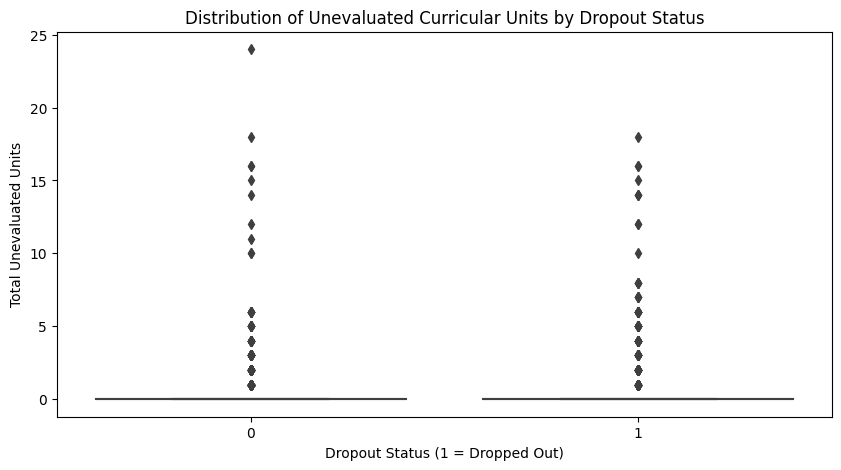

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# 1. Define students with high unevaluated curricular units
# Calculate the total unevaluated curricular units for each student across both semesters
df_school['Total Unevaluated Units'] = df_school['Curricular units 1st sem (without evaluations)'] + df_school['Curricular units 2nd sem (without evaluations)']

# Define a threshold for "high unevaluated curricular units" (let's use the 75th percentile as an example)
threshold = df_school['Total Unevaluated Units'].quantile(0.75)
high_unevaluated_students = df_school[df_school['Total Unevaluated Units'] > threshold]

# 2. Calculate the dropout rate for students with high unevaluated curricular units
dropout_rate_high_unevaluated = (high_unevaluated_students['Target'] == 'Dropout').mean()

print(f"Dropout rate for students with high unevaluated curricular units: {dropout_rate_high_unevaluated:.2f}")

# 3. Correlation between the number of unevaluated curricular units and dropout status
# For this, we'll convert the 'Target' column to a binary form where 'Dropout' is 1 and other statuses are 0
df_school['Is_Dropout'] = np.where(df_school['Target'] == 'Dropout', 1, 0)
correlation, _ = pointbiserialr(df_school['Total Unevaluated Units'], df_school['Is_Dropout'])

print(f"Correlation between number of unevaluated curricular units and dropout status: {correlation:.3f}")

# Visualization
plt.figure(figsize=(10, 5))
sns.boxplot(x='Is_Dropout', y='Total Unevaluated Units', data=df_school)
plt.title("Distribution of Unevaluated Curricular Units by Dropout Status")
plt.xlabel("Dropout Status (1 = Dropped Out)")
plt.ylabel("Total Unevaluated Units")
plt.show()


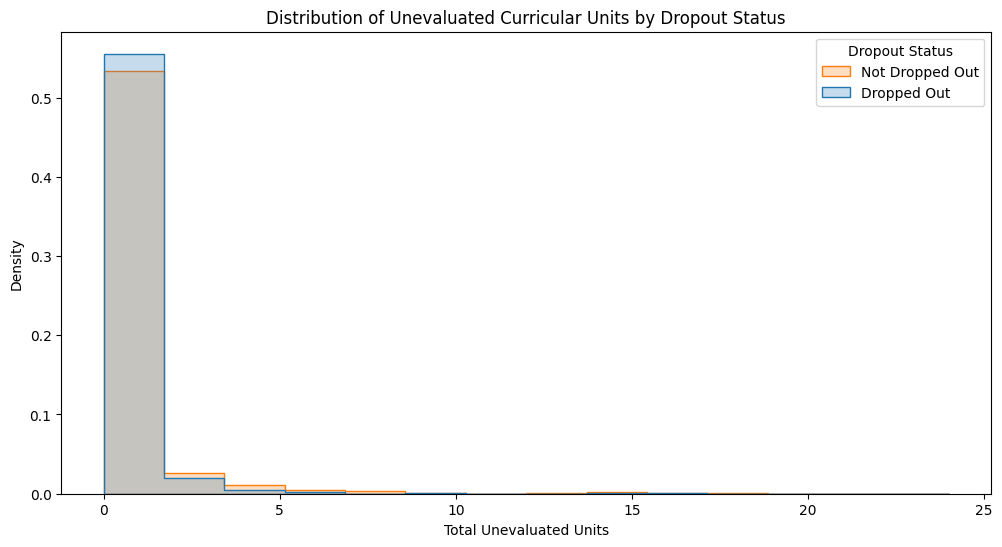

In [76]:
plt.figure(figsize=(12, 6))
sns.histplot(df_school, x='Total Unevaluated Units', hue='Is_Dropout', element="step", stat="density", common_norm=False)
plt.title("Distribution of Unevaluated Curricular Units by Dropout Status")
plt.xlabel("Total Unevaluated Units")
plt.ylabel("Density")
plt.legend(title='Dropout Status', labels=['Not Dropped Out', 'Dropped Out'])
plt.show()


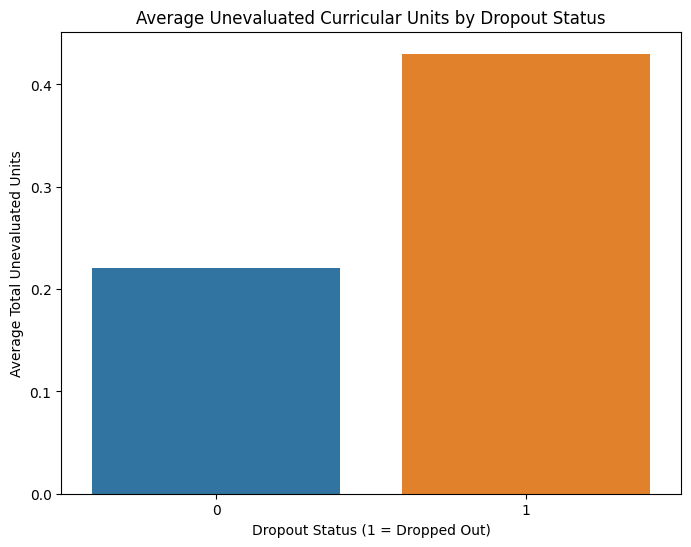

In [77]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Is_Dropout', y='Total Unevaluated Units', data=df_school, errorbar=None)
plt.title("Average Unevaluated Curricular Units by Dropout Status")
plt.xlabel("Dropout Status (1 = Dropped Out)")
plt.ylabel("Average Total Unevaluated Units")
plt.show()


In [78]:
# Define the mapping
app_mode_mapping = {
    1: "1st phase—general contingent",
    2: "Ordinance No. 612/93",
    3: "1st phase—special contingent (Azores Island)",
    4: "Holders of other higher courses",
    5: "Ordinance No. 854-B/99",
    6: "International student (bachelor)",
    7: "1st phase—special contingent (Madeira Island)",
    8: "2nd phase—general contingent",
    9: "3rd phase—general contingent",
    10: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    11: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    12: "Over 23 years old",
    13: "Transfer",
    14: "Change in course",
    15: "Technological specialization diploma holders",
    16: "Change in institution/course",
    17: "Short cycle diploma holders",
    18: "Change in institution/course (International)"
}

# Use the replace method on the 'Application mode' column
df_school['Application mode'] = df_school['Application mode'].replace(app_mode_mapping)


In [79]:
df_school['Application mode'].unique()

array(['2nd phase—general contingent', 'International student (bachelor)',
       '1st phase—general contingent', 'Over 23 years old',
       '3rd phase—general contingent', 'Short cycle diploma holders',
       'Technological specialization diploma holders',
       'Change in institution/course', 'Change in course',
       'Holders of other higher courses', 'Transfer',
       '1st phase—special contingent (Madeira Island)',
       '1st phase—special contingent (Azores Island)',
       'Ordinance No. 612/93', 'Ordinance No. 854-B/99',
       'Change in institution/course (International)',
       'Ordinance No. 533-A/99, item b2) (Different Plan)',
       'Ordinance No. 533-A/99, item b3 (Other Institution)'],
      dtype=object)

In [80]:
print(df_school['Application mode'].value_counts())
print("\n")
print(df_school['Application order'].value_counts())


1st phase—general contingent                           1708
2nd phase—general contingent                            872
Over 23 years old                                       785
Change in course                                        312
Technological specialization diploma holders            213
Holders of other higher courses                         139
3rd phase—general contingent                            124
Transfer                                                 77
Change in institution/course                             59
1st phase—special contingent (Madeira Island)            38
Short cycle diploma holders                              35
International student (bachelor)                         30
1st phase—special contingent (Azores Island)             16
Ordinance No. 854-B/99                                   10
Ordinance No. 612/93                                      3
Change in institution/course (International)              1
Ordinance No. 533-A/99, item b2) (Differ

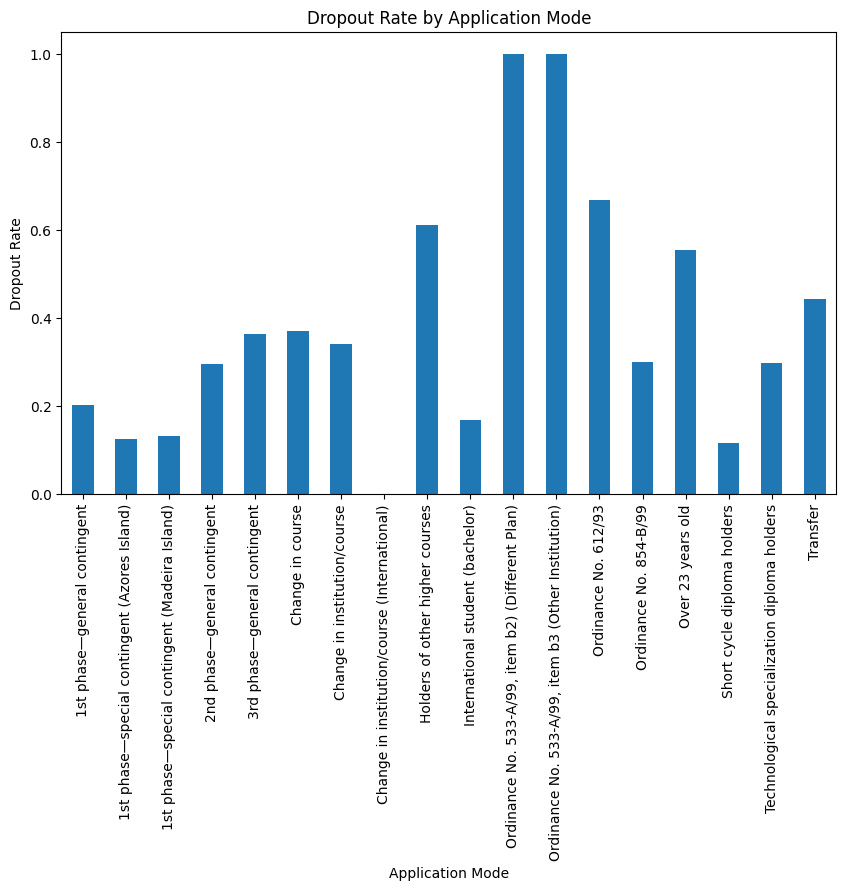

In [81]:
# Create a crosstab table of 'Application mode' vs 'Target'
app_mode_vs_dropout = pd.crosstab(df_school['Application mode'], df_school['Target'], normalize='index')

# Visualize the dropout rates for each application mode
app_mode_vs_dropout['Dropout'].plot(kind='bar', figsize=(10, 6))
plt.title("Dropout Rate by Application Mode")
plt.ylabel("Dropout Rate")
plt.xlabel("Application Mode")
plt.show()


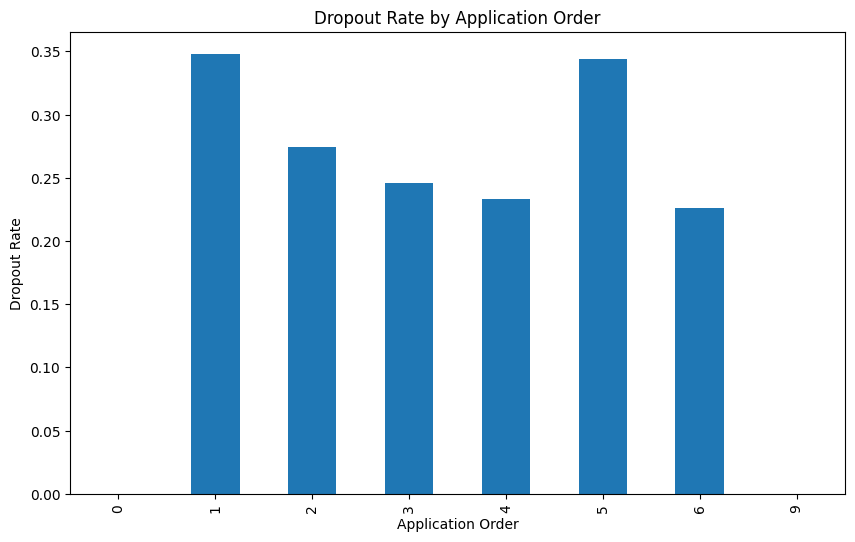

In [82]:
# Create a crosstab table of 'Application order' vs 'Target'
app_order_vs_dropout = pd.crosstab(df_school['Application order'], df_school['Target'], normalize='index')

# Visualize the dropout rates for each application order
app_order_vs_dropout['Dropout'].plot(kind='bar', figsize=(10, 6))
plt.title("Dropout Rate by Application Order")
plt.ylabel("Dropout Rate")
plt.xlabel("Application Order")
plt.show()


In [83]:
from scipy.stats import chi2_contingency

# Chi-squared test for Application Mode
chi2_stat, p_val_mode, _, _ = chi2_contingency(pd.crosstab(df_school['Application mode'], df_school['Target']))
print(f"Chi-squared Test Result for Application Mode: Statistic = {chi2_stat:.2f}, P-value = {p_val_mode:.4f}")

# Chi-squared test for Application Order
chi2_stat, p_val_order, _, _ = chi2_contingency(pd.crosstab(df_school['Application order'], df_school['Target']))
print(f"Chi-squared Test Result for Application Order: Statistic = {chi2_stat:.2f}, P-value = {p_val_order:.4f}")


Chi-squared Test Result for Application Mode: Statistic = 466.51, P-value = 0.0000
Chi-squared Test Result for Application Order: Statistic = 69.61, P-value = 0.0000


### Influence of age at enrollment on outcome

In [84]:
print(df_school['Age at enrollment'].describe())


count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64


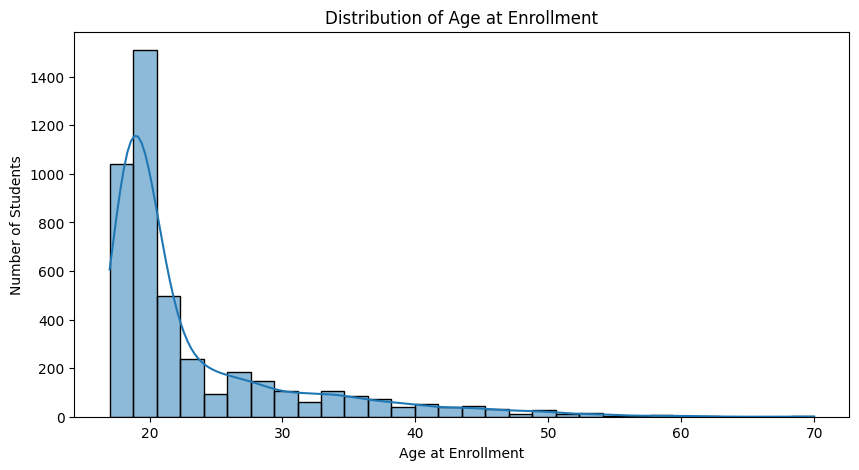

In [85]:
#Histogram of Age Distribution

plt.figure(figsize=(10, 5))
sns.histplot(df_school['Age at enrollment'], kde=True, bins=30)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Number of Students')
plt.show()


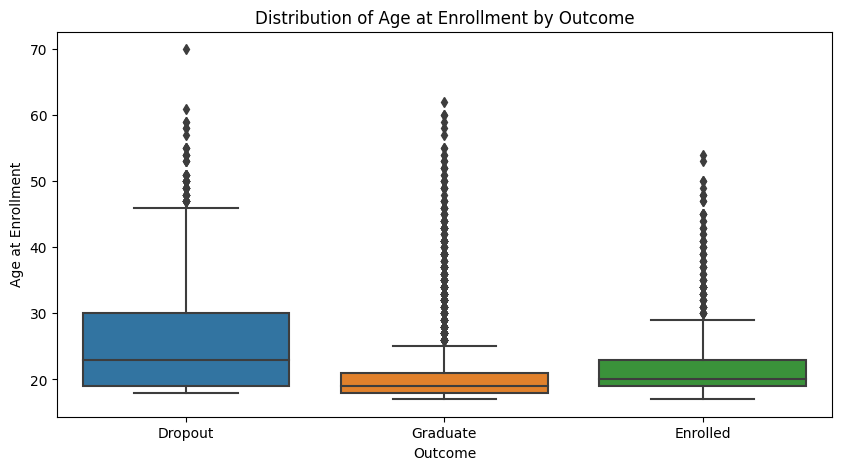

In [86]:
#Boxplot of Age Distribution by Outcome

plt.figure(figsize=(10, 5))
sns.boxplot(x='Target', y='Age at enrollment', data=df_school)
plt.title('Distribution of Age at Enrollment by Outcome')
plt.ylabel('Age at Enrollment')
plt.xlabel('Outcome')
plt.show()


In [87]:
#Statistical Testing

import scipy.stats as stats

# Performing an ANOVA test
f_value, p_value = stats.f_oneway(
    df_school[df_school['Target'] == 'Dropout']['Age at enrollment'],
    df_school[df_school['Target'] == 'Graduate']['Age at enrollment']
    # Add more groups if needed
)

print(f"F-value: {f_value}")
print(f"P-value: {p_value}")


F-value: 279.00527616229147
P-value: 2.11388516898117e-60


In [88]:
dropout_data = df_school[df_school['Target'] == 'Dropout']

print("Male Dropouts Age Distribution:")
print(dropout_data[dropout_data['Gender'] == 'male']['Age at enrollment'].describe())
print("\nFemale Dropouts Age Distribution:")
print(dropout_data[dropout_data['Gender'] == 'female']['Age at enrollment'].describe())


Male Dropouts Age Distribution:
count    701.000000
mean      27.032810
std        9.036928
min       18.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       70.000000
Name: Age at enrollment, dtype: float64

Female Dropouts Age Distribution:
count    720.000000
mean      25.130556
std        8.266066
min       18.000000
25%       19.000000
50%       21.000000
75%       29.000000
max       59.000000
Name: Age at enrollment, dtype: float64


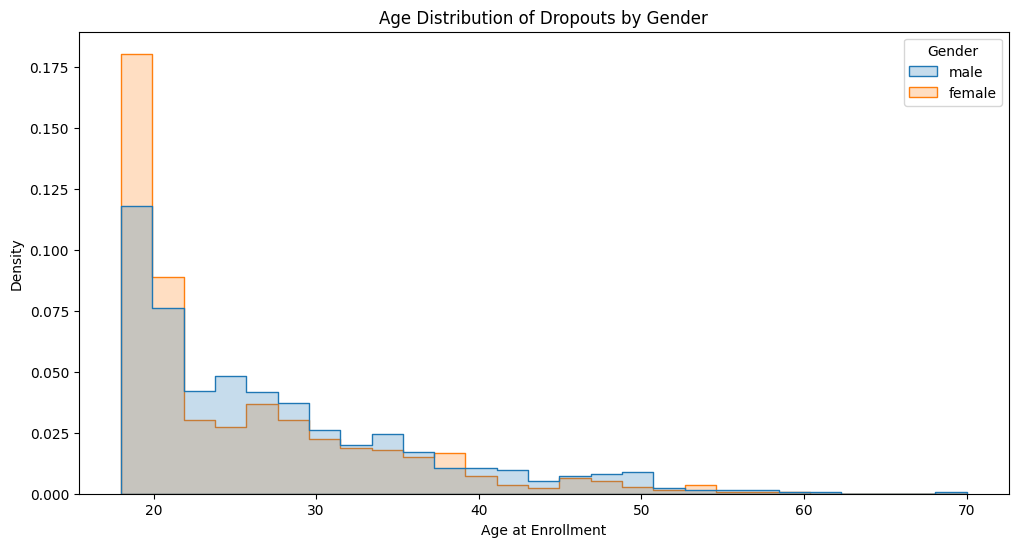

In [89]:
plt.figure(figsize=(12, 6))

sns.histplot(data=dropout_data, x='Age at enrollment', hue='Gender', element="step", stat="density", common_norm=False)
plt.title('Age Distribution of Dropouts by Gender')
plt.xlabel('Age at Enrollment')
plt.ylabel('Density')
plt.show()


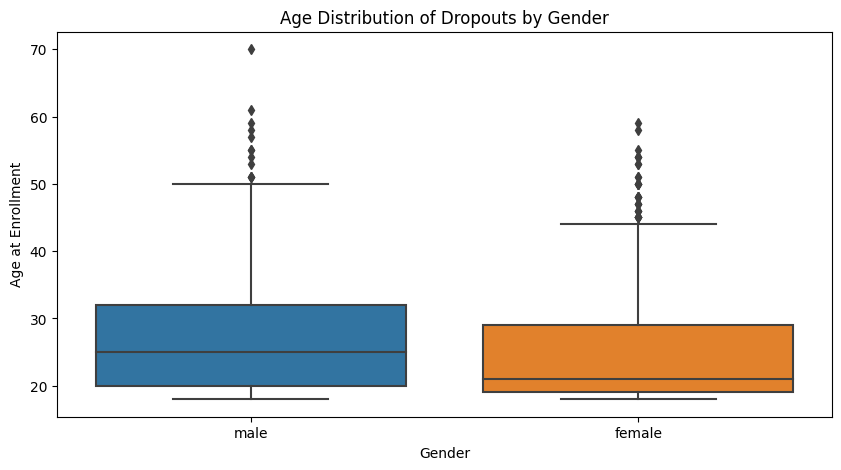

In [90]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Gender', y='Age at enrollment', data=dropout_data)
plt.title('Age Distribution of Dropouts by Gender')
plt.ylabel('Age at Enrollment')
plt.xlabel('Gender')
plt.show()


In [91]:
international_dropouts = df_school[(df_school['Target'] == 'Dropout') & (df_school['International'] == 1)]

print("International Dropouts with Scholarship Age Distribution:")
print(international_dropouts[international_dropouts['Scholarship holder'] == 1]['Age at enrollment'].describe())
print("\nInternational Dropouts without Scholarship Age Distribution:")
print(international_dropouts[international_dropouts['Scholarship holder'] == 0]['Age at enrollment'].describe())


International Dropouts with Scholarship Age Distribution:
count     3.000000
mean     20.666667
std       3.785939
min      18.000000
25%      18.500000
50%      19.000000
75%      22.000000
max      25.000000
Name: Age at enrollment, dtype: float64

International Dropouts without Scholarship Age Distribution:
count    29.000000
mean     26.137931
std       8.605331
min      18.000000
25%      19.000000
50%      23.000000
75%      33.000000
max      54.000000
Name: Age at enrollment, dtype: float64


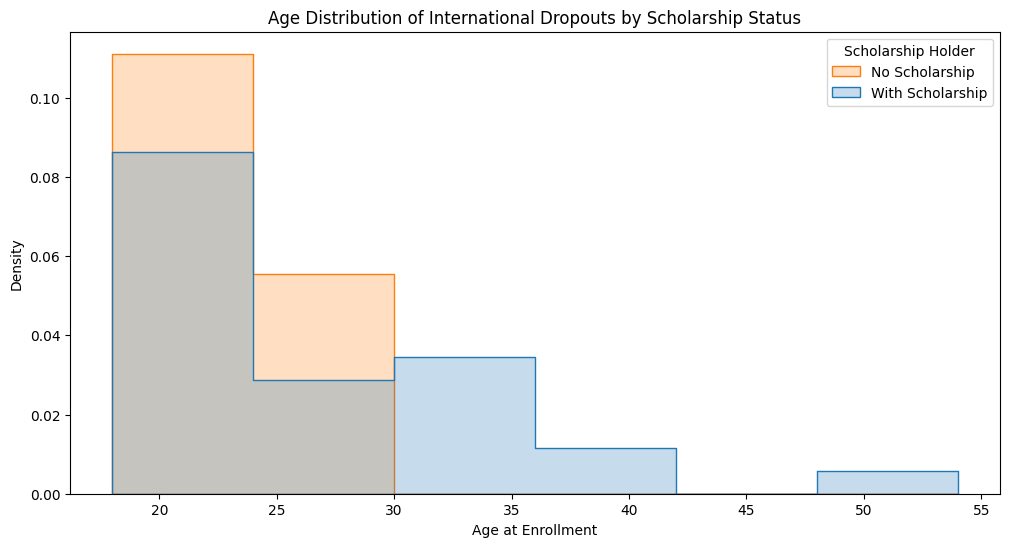

In [92]:
plt.figure(figsize=(12, 6))
sns.histplot(data=international_dropouts, x='Age at enrollment', hue='Scholarship holder', element="step", stat="density", common_norm=False, palette="tab10")
plt.title('Age Distribution of International Dropouts by Scholarship Status')
plt.xlabel('Age at Enrollment')
plt.ylabel('Density')
plt.legend(title='Scholarship Holder', labels=['No Scholarship', 'With Scholarship'])
plt.show()


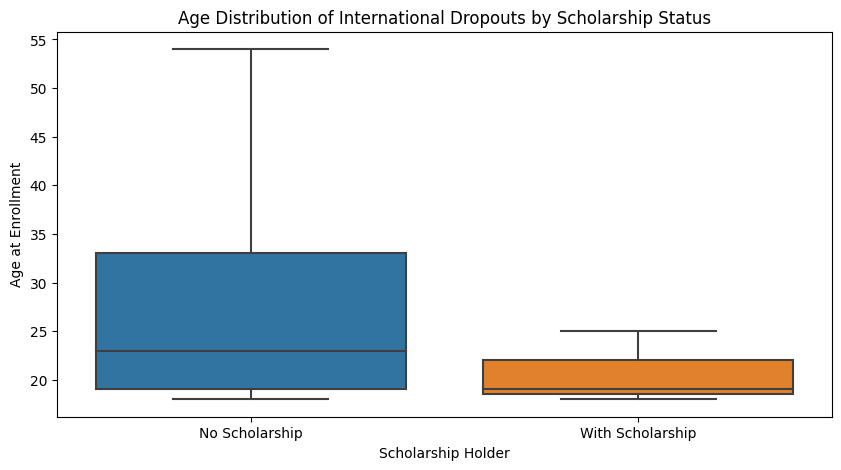

In [93]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Scholarship holder', y='Age at enrollment', data=international_dropouts, palette="tab10")
plt.title('Age Distribution of International Dropouts by Scholarship Status')
plt.ylabel('Age at Enrollment')
plt.xlabel('Scholarship Holder')
plt.xticks([0, 1], ['No Scholarship', 'With Scholarship'])
plt.show()


In [94]:
# Filter out data for international students
international_students = df_school[df_school['International'] == 1]

# Compute the number of dropouts for each age, broken down by scholarship status
dropout_counts = international_students[international_students['Target'] == 'Dropout'].groupby(['Age at enrollment', 'Scholarship holder']).size().reset_index(name='Dropout Counts')

# Compute the total number of students for each age, broken down by scholarship status
total_counts = international_students.groupby(['Age at enrollment', 'Scholarship holder']).size().reset_index(name='Total Counts')

# Merge the dropout counts and total counts dataframes on age and scholarship status
merged_df = pd.merge(total_counts, dropout_counts, on=['Age at enrollment', 'Scholarship holder'], how='left').fillna(0)

# Compute the dropout rate for each age and scholarship status
merged_df['Dropout Rate (%)'] = (merged_df['Dropout Counts'] / merged_df['Total Counts']) * 100

merged_df


,Age at enrollment,Scholarship holder,Total Counts,Dropout Counts,Dropout Rate (%)
0,18,0,14,6.0,42.857143
1,18,1,4,1.0,25.000000
2,19,0,12,2.0,16.666667
3,19,1,5,1.0,20.000000
4,20,0,17,3.0,17.647059
5,20,1,5,0.0,0.000000
6,21,0,10,1.0,10.000000
7,21,1,1,0.0,0.000000
8,22,0,7,1.0,14.285714
9,22,1,1,0.0,0.000000


In [95]:
# Filter out data for international students
international_students = df_school[df_school['International'] == 1]

# Compute the number of dropouts for each age, broken down by scholarship status and gender
dropout_counts = international_students[international_students['Target'] == 'Dropout'].groupby(['Age at enrollment', 'Scholarship holder', 'Gender']).size().reset_index(name='Dropout Counts')

# Compute the total number of students for each age, broken down by scholarship status and gender
total_counts = international_students.groupby(['Age at enrollment', 'Scholarship holder', 'Gender']).size().reset_index(name='Total Counts')

# Merge the dropout counts and total counts dataframes on age, scholarship status, and gender
merged_df = pd.merge(total_counts, dropout_counts, on=['Age at enrollment', 'Scholarship holder', 'Gender'], how='left').fillna(0)

# Compute the dropout rate for each age, scholarship status, and gender
merged_df['Dropout Rate (%)'] = (merged_df['Dropout Counts'] / merged_df['Total Counts']) * 100

merged_df


,Age at enrollment,Scholarship holder,Gender,Total Counts,Dropout Counts,Dropout Rate (%)
0,18,0,female,12,5.0,41.666667
1,18,0,male,2,1.0,50.000000
2,18,1,female,3,1.0,33.333333
3,18,1,male,1,0.0,0.000000
4,19,0,female,10,2.0,20.000000
5,19,0,male,2,0.0,0.000000
6,19,1,female,5,1.0,20.000000
7,20,0,female,11,2.0,18.181818
8,20,0,male,6,1.0,16.666667
9,20,1,female,5,0.0,0.000000


In [96]:
# Filter rows where the dropout rate is 100%
high_dropout_df = merged_df[merged_df['Dropout Rate (%)'] == 100]

high_dropout_df


,Age at enrollment,Scholarship holder,Gender,Total Counts,Dropout Counts,Dropout Rate (%)
23,25,1,male,1,1.0,100.0
24,26,0,female,1,1.0,100.0
25,26,0,male,1,1.0,100.0
26,27,0,male,1,1.0,100.0
29,29,0,female,1,1.0,100.0
30,30,0,female,1,1.0,100.0
33,33,0,female,2,2.0,100.0
34,34,0,female,1,1.0,100.0
35,35,0,male,2,2.0,100.0
37,39,0,female,1,1.0,100.0


## Basic Cohort Analysis 1

In [97]:
#Define Cohorts
df_school['Age Cohort'] = pd.cut(df_school['Age at enrollment'], bins=[17, 20, 25, 30, 35, 40, 50], labels=['18-20', '21-25', '26-30', '31-35', '36-40', '41-50'])


In [98]:
# For the first semester
dropout_counts_1st = df_school[(df_school['Target'] == 'Dropout') & (df_school['Curricular units 1st sem (enrolled)'] > 0)].groupby(['Age Cohort', 'Gender', 'International', 'Daytime/evening attendance']).size()
total_counts_1st = df_school[df_school['Curricular units 1st sem (enrolled)'] > 0].groupby(['Age Cohort', 'Gender', 'International', 'Daytime/evening attendance']).size()
dropout_rates_1st = (dropout_counts_1st / total_counts_1st) * 100

# For the second semester
dropout_counts_2nd = df_school[(df_school['Target'] == 'Dropout') & (df_school['Curricular units 2nd sem (enrolled)'] > 0)].groupby(['Age Cohort', 'Gender', 'International', 'Daytime/evening attendance']).size()
total_counts_2nd = df_school[df_school['Curricular units 2nd sem (enrolled)'] > 0].groupby(['Age Cohort', 'Gender', 'International', 'Daytime/evening attendance']).size()
dropout_rates_2nd = (dropout_counts_2nd / total_counts_2nd) * 100


In [99]:
dropout_rates = pd.concat([dropout_rates_1st.rename("1st Sem Dropout Rate"), dropout_rates_2nd.rename("2nd Sem Dropout Rate")], axis=1)


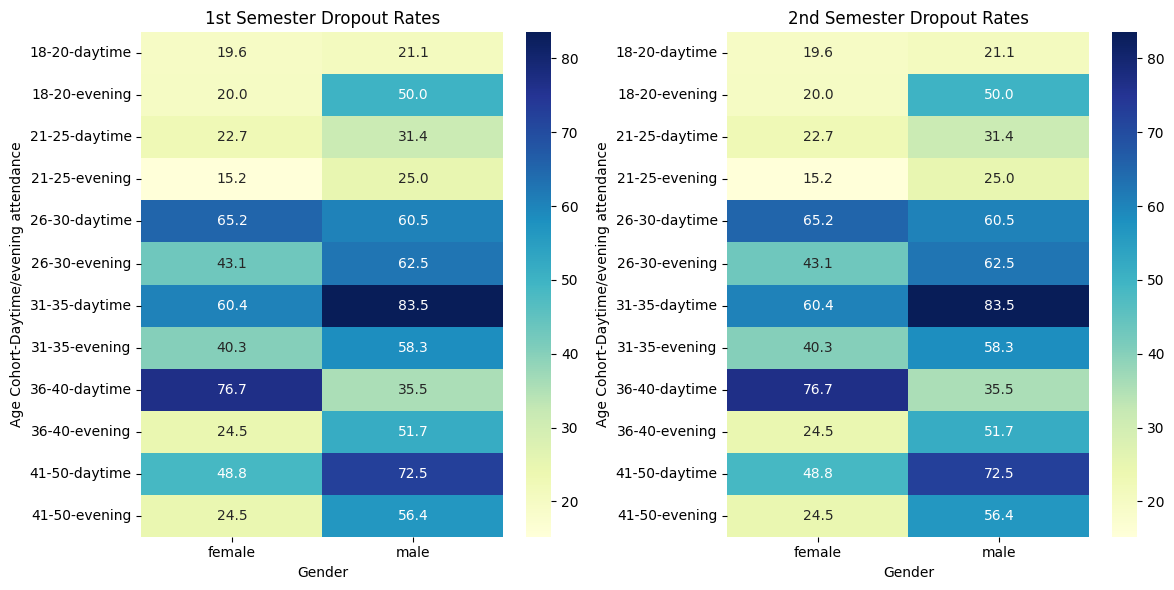

In [100]:
# For the 1st semester
heatmap_data_1st = dropout_rates.reset_index()
heatmap_data_1st = heatmap_data_1st.pivot_table(index=['Age Cohort', 'Daytime/evening attendance'], columns='Gender', values='1st Sem Dropout Rate')

# For the 2nd semester
heatmap_data_2nd = dropout_rates.reset_index()
heatmap_data_2nd = heatmap_data_2nd.pivot_table(index=['Age Cohort', 'Daytime/evening attendance'], columns='Gender', values='2nd Sem Dropout Rate')

# You can visualize each semester separately or use subplots to visualize them side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data_1st, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('1st Semester Dropout Rates')

plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data_2nd, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('2nd Semester Dropout Rates')

plt.tight_layout()
plt.show()


## Basic Cohort Analysis 2

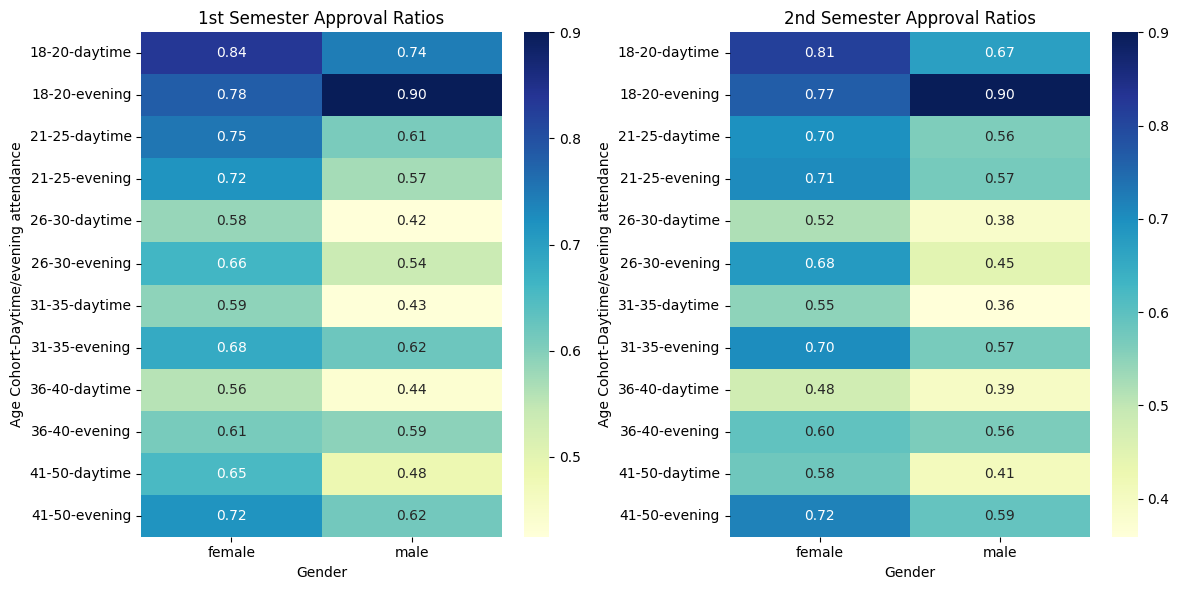

In [101]:
#Generate the Cohort Analysis Data:
cohort_data = df_school.groupby(['Age Cohort', 'Daytime/evening attendance', 'Gender']).agg({
    'Approval_Ratio_1st_Sem': 'mean',
    'Approval_Ratio_2nd_Sem': 'mean'
}).reset_index()

#Pivot the Data for Heatmap Visualization:
heatmap_data_approval_1st = cohort_data.pivot_table(index=['Age Cohort', 'Daytime/evening attendance'], columns='Gender', values='Approval_Ratio_1st_Sem')
heatmap_data_approval_2nd = cohort_data.pivot_table(index=['Age Cohort', 'Daytime/evening attendance'], columns='Gender', values='Approval_Ratio_2nd_Sem')

#Visualize:
plt.figure(figsize=(12, 6))

# 1st Semester Approval Ratios
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data_approval_1st, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('1st Semester Approval Ratios')

# 2nd Semester Approval Ratios
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data_approval_2nd, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('2nd Semester Approval Ratios')

plt.tight_layout()
plt.show()
